In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [5]:
TMP = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\temperature.csv')
TMP.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [6]:
TMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
TMP.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
TMP.isnull().sum().sum()

1248

In [9]:
TMP.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [11]:
TMP.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

# Data Preprocessing

In [13]:
TMP['Date']=pd.to_datetime(TMP['Date'])
TMP['Day']=TMP['Date'].apply(lambda x:x.day)
TMP['Month']=TMP['Date'].apply(lambda x:x.month)
TMP['Year']=TMP['Date'].apply(lambda x:x.year)
TMP.drop('Date', axis=1, inplace=True)
TMP.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

    Day  Month    Year  
0  30.0    6.0  2013.0  
1  30.0    6.0  2013.0  
2  30.0    6.0  2013.0  
3  30.0    6.0  2013.0  
4  30.0    6.0  2013.0  

[5 rows x 27 columns]

In [14]:
!pip install reverse_geocoder
import reverse_geocoder as rg
import pprint

     ---------------------------------------- 2.2/2.2 MB 35.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268077 sha256=ead868ca954bbbf036605774498893246fbe11015c461219fd887cc8d0da6584
  Stored in directory: c:\users\envy\appdata\local\pip\cache\wheels\1c\07\35\8bc99c070537c835a0696e47609f6270f174cb70b86b65c7d8
Successfully built reverse_geocoder


In [15]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(TMP['lat'], TMP['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)

geo_names = pd.DataFrame(geodata).transpose()
print(geo_names)

Loading formatted geocoded file...
                                                      0
0     {'lat': '37.566', 'lon': '126.9784', 'name': '...
1     {'lat': '37.566', 'lon': '126.9784', 'name': '...
2     {'lat': '37.566', 'lon': '126.9784', 'name': '...
3     {'lat': '37.566', 'lon': '126.9784', 'name': '...
4     {'lat': '37.5986', 'lon': '127.1394', 'name': ...
...                                                 ...
7747  {'lat': '37.47722', 'lon': '126.86639', 'name'...
7748  {'lat': '37.47722', 'lon': '126.86639', 'name'...
7749  {'lat': '37.566', 'lon': '126.9784', 'name': '...
7750  {'lat': '37.47722', 'lon': '126.86639', 'name'...
7751  {'lat': '37.5986', 'lon': '127.1394', 'name': ...

[7752 rows x 1 columns]


In [16]:
TMP['State']=geo_names[0].apply(lambda x:x.get('admin1'))
TMP['City']=geo_names[0].apply(lambda x:x.get('name'))
TMP.drop(['lat','lon'], axis=1, inplace=True)
TMP

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...       DEM     Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0     ...  212.3350  2.785000      5992.895996       29.1       21.2  30.0   
1     ...   44.7624  0.514100      5869.312500       30.5       22.5  30.0   
2     ...   33.3068  0.266100      5863.555664       31.1       23.9  30.0   
3     ...   45.7160  2.534800      5856.964844       31.7       24.3  30.0   
4     ...   35.0380  0.505500      5859.552246       31.2       22.5  30.0   
...   ...       ...       ...              ...        ...        ...   ...   
7747  ...   15.5876  0.155400      4443.313965       28.3       18.1  30.0   
7748  ...   17.2956  0.222300      4438.373535       28.6       18.8  30.0   
7749  ...   19.5844  0.271300      4451.345215       27.8       17.4  30.0   
7750  ...   12.3700  0.098475      4329.520508       17.4       11.3   NaN   
7751  ...  212.3350  5.178230      5992.895996       38.9       29.8   NaN   

      Month    Year        State        City  
0       6.0  2013.0        Seoul       Seoul  
1       6.0  2013.0        Seoul       Seoul  
2       6.0  2013.0        Seoul       Seoul  
3       6.0  2013.0        Seoul       Seoul  
4       6.0  2013.0  Gyeonggi-do     Guri-si  
...     ...     ...          ...         ...  
7747    8.0  2017.0  Gyeonggi-do  Kwangmyong  
7748    8.0  2017.0  Gyeonggi-do  Kwangmyong  
7749    8.0  2017.0        Seoul       Seoul  
7750    NaN     NaN  Gyeonggi-do  Kwangmyong  
7751    NaN     NaN  Gyeonggi-do     Guri-si  

[7752 rows x 27 columns]

In [17]:
TMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [18]:
TMP.nunique().to_frame()

0
station             25
Present_Tmax       167
Present_Tmin       155
LDAPS_RHmin       7672
LDAPS_RHmax       7664
LDAPS_Tmax_lapse  7675
LDAPS_Tmin_lapse  7675
LDAPS_WS          7675
LDAPS_LH          7675
LDAPS_CC1         7569
LDAPS_CC2         7582
LDAPS_CC3         7599
LDAPS_CC4         7524
LDAPS_PPT1        2812
LDAPS_PPT2        2510
LDAPS_PPT3        2356
LDAPS_PPT4        1918
DEM                 25
Slope               27
Solar radiation   1575
Next_Tmax          183
Next_Tmin          157
Day                 21
Month               12
Year                 5
State                2
City                 7

In [19]:
TMP.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
State                0
City                 0
dtype: int64

In [20]:
print('missing value percentage')

for col in TMP:
    percentage= np.round(TMP[col].isnull().sum()/TMP.shape[0]*100,3)
    print(col, ":".format(), percentage, '%')

missing value percentage
station : 0.026 %
Present_Tmax : 0.903 %
Present_Tmin : 0.903 %
LDAPS_RHmin : 0.967 %
LDAPS_RHmax : 0.967 %
LDAPS_Tmax_lapse : 0.967 %
LDAPS_Tmin_lapse : 0.967 %
LDAPS_WS : 0.967 %
LDAPS_LH : 0.967 %
LDAPS_CC1 : 0.967 %
LDAPS_CC2 : 0.967 %
LDAPS_CC3 : 0.967 %
LDAPS_CC4 : 0.967 %
LDAPS_PPT1 : 0.967 %
LDAPS_PPT2 : 0.967 %
LDAPS_PPT3 : 0.967 %
LDAPS_PPT4 : 0.967 %
DEM : 0.0 %
Slope : 0.0 %
Solar radiation : 0.0 %
Next_Tmax : 0.348 %
Next_Tmin : 0.348 %
Day : 0.026 %
Month : 0.026 %
Year : 0.026 %
State : 0.0 %
City : 0.0 %


In [22]:
print('we had {} rows and {} columns before droping the null values columns.'.format(TMP.shape[0],TMP.shape[1]))
TMP.dropna(inplace=True)
print('we hav {} rows and {} columns after dropping the null values columns'.format(TMP.shape[0],TMP.shape[1]))

we had 7752 rows and 27 columns before droping the null values columns.
we hav 7588 rows and 27 columns after dropping the null values columns


In [23]:
TMP.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
State               0
City                0
dtype: int64

In [24]:
object_datatype=[]
for x in TMP.dtypes.index:
    if TMP.dtypes[x]=='O':
        object_datatype.append(x)
print(object_datatype)

['State', 'City']


# Visualization

In [28]:
col=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year',
       'State', 'City']
print(col)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year', 'State', 'City']


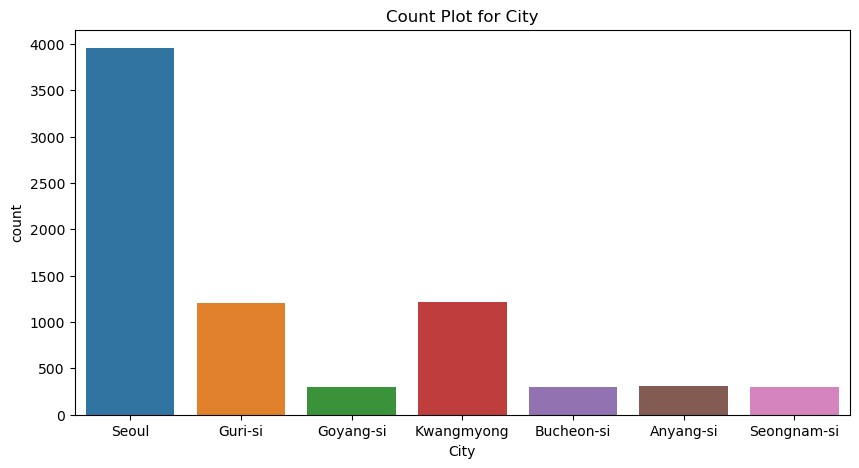

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='City')
plt.title('Count Plot for City')
plt.show()

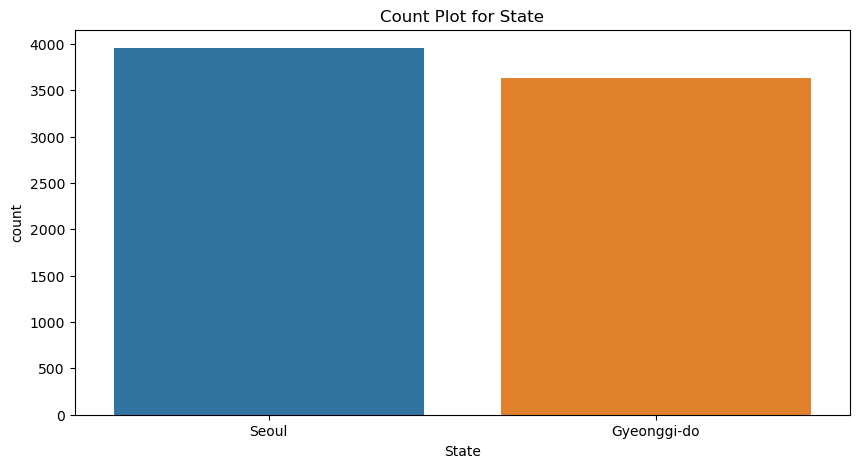

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='State')
plt.title('Count Plot for State')
plt.show()

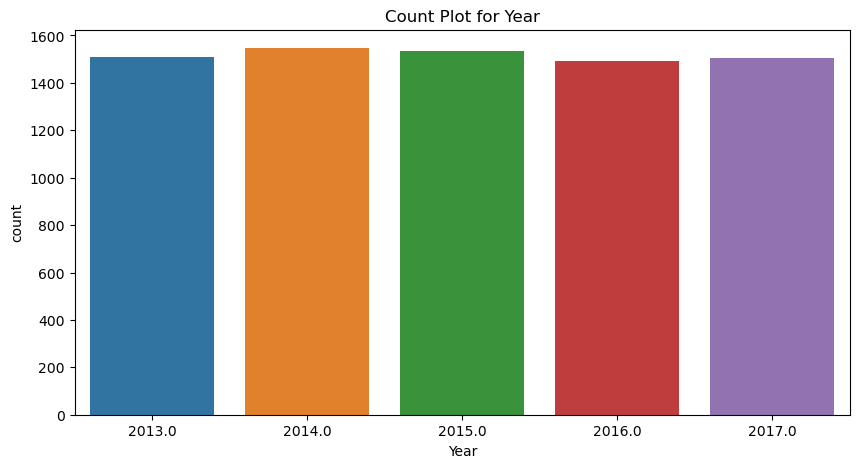

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='Year')
plt.title('Count Plot for Year')
plt.show()

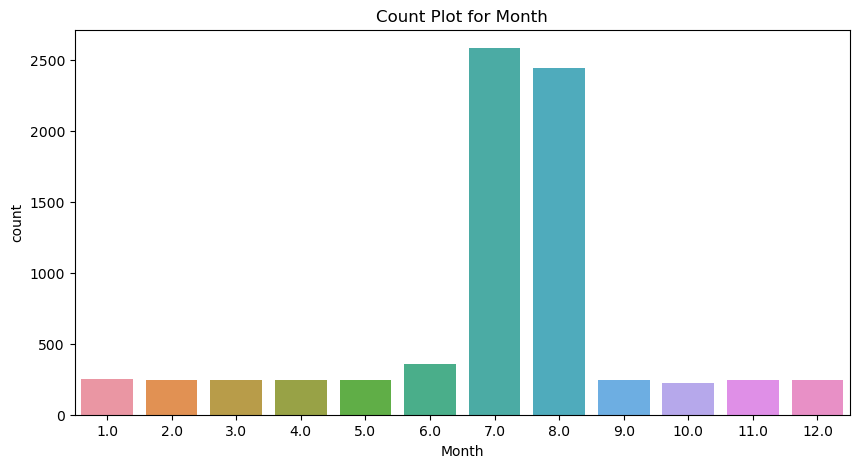

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='Month')
plt.title('Count Plot for Month')
plt.show()

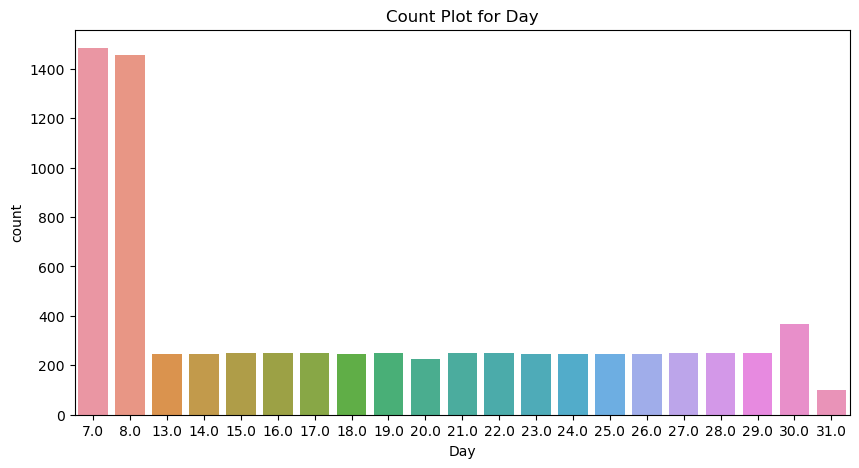

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='Day')
plt.title('Count Plot for Day')
plt.show()

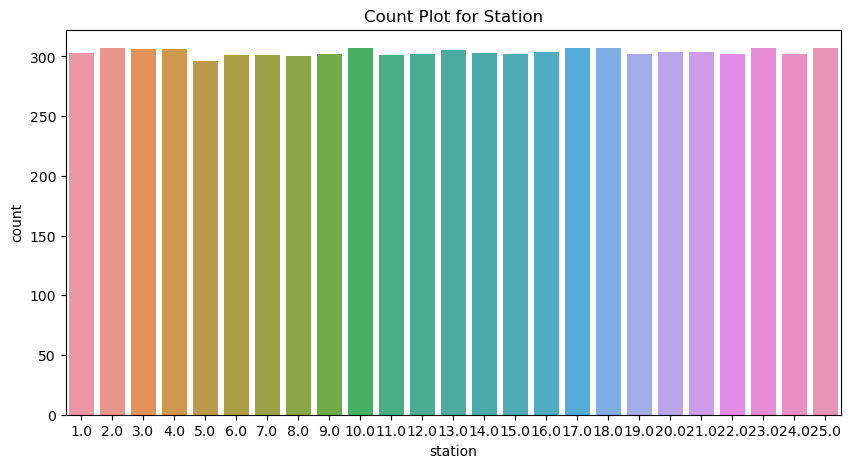

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='station')
plt.title('Count Plot for Station')
plt.show()

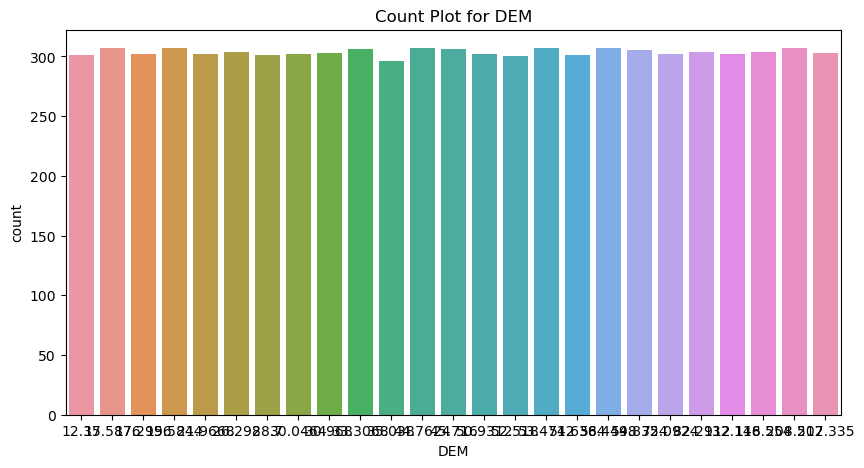

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='DEM')
plt.title('Count Plot for DEM')
plt.show()

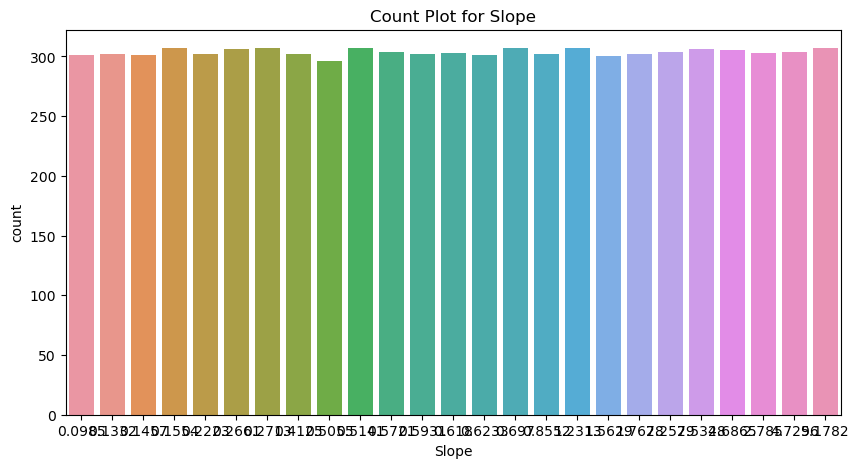

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=TMP, x='Slope')
plt.title('Count Plot for Slope')
plt.show()

In [53]:
col2 = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

Scatter plot for Present_Tmax column with respect to the rows covered ->


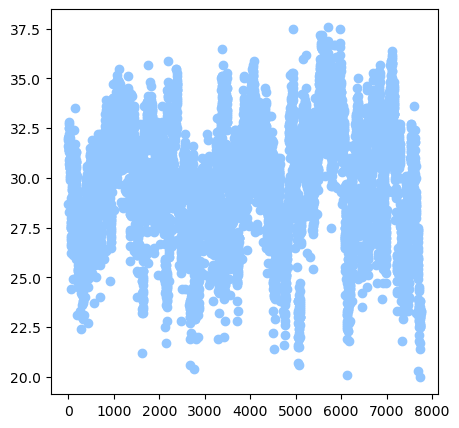

Scatter plot for Present_Tmin column with respect to the rows covered ->


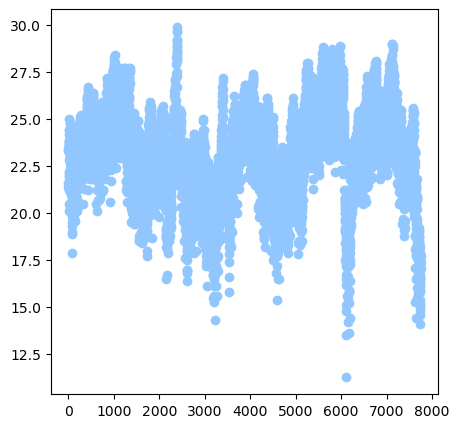

Scatter plot for LDAPS_RHmin column with respect to the rows covered ->


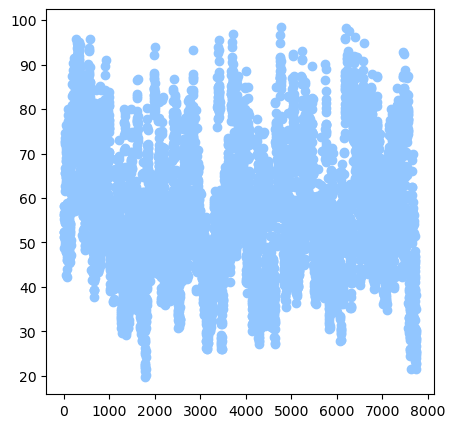

Scatter plot for LDAPS_RHmax column with respect to the rows covered ->


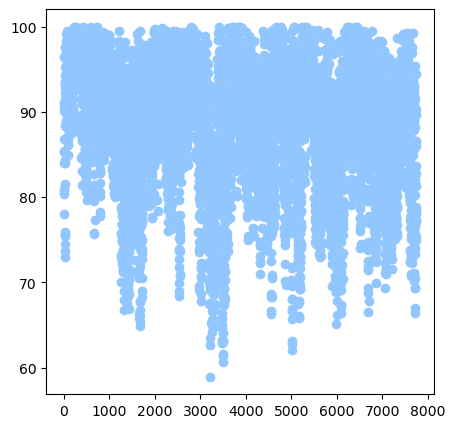

Scatter plot for LDAPS_Tmax_lapse column with respect to the rows covered ->


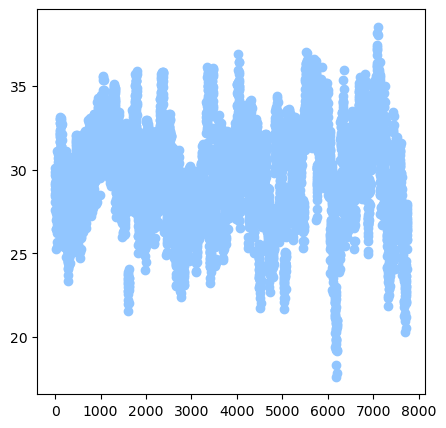

Scatter plot for LDAPS_Tmin_lapse column with respect to the rows covered ->


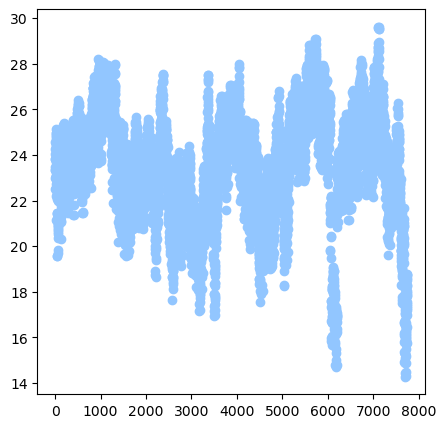

Scatter plot for LDAPS_WS column with respect to the rows covered ->


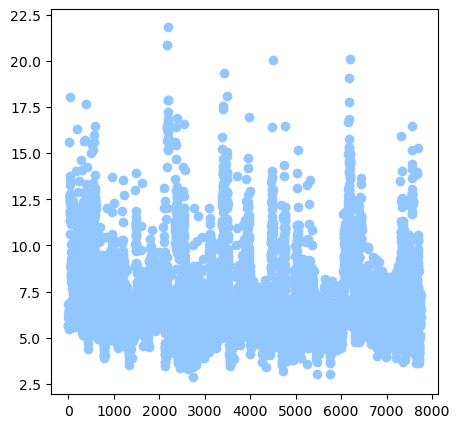

Scatter plot for LDAPS_LH column with respect to the rows covered ->


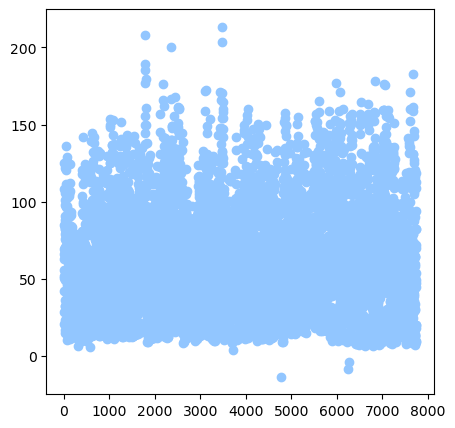

Scatter plot for LDAPS_CC1 column with respect to the rows covered ->


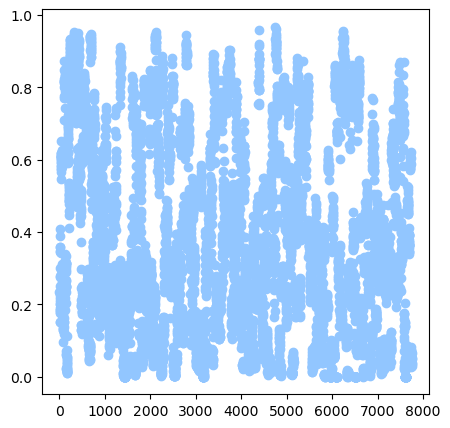

Scatter plot for LDAPS_CC2 column with respect to the rows covered ->


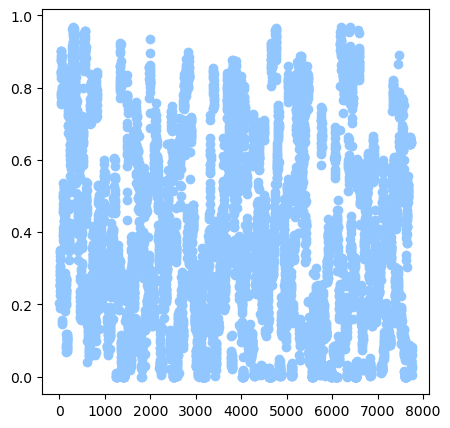

Scatter plot for LDAPS_CC3 column with respect to the rows covered ->


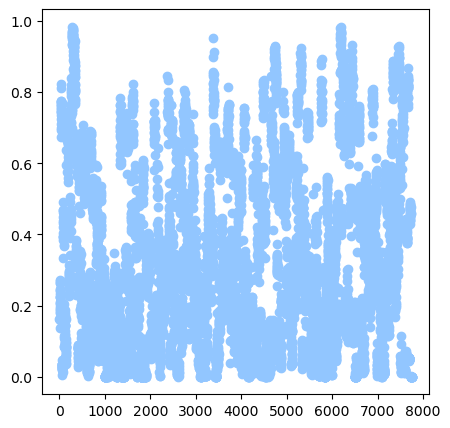

Scatter plot for LDAPS_CC4 column with respect to the rows covered ->


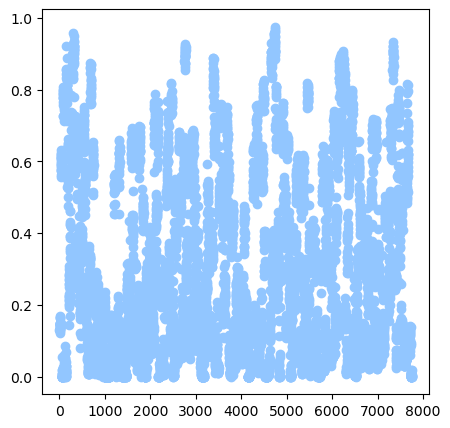

Scatter plot for LDAPS_PPT1 column with respect to the rows covered ->


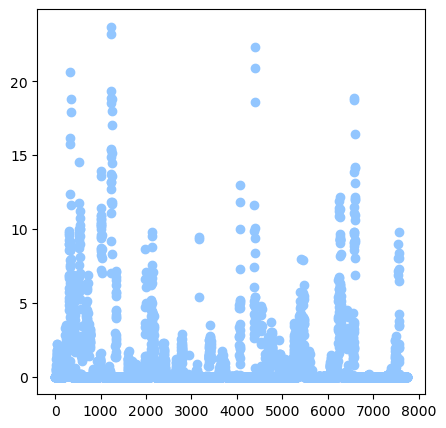

Scatter plot for LDAPS_PPT2 column with respect to the rows covered ->


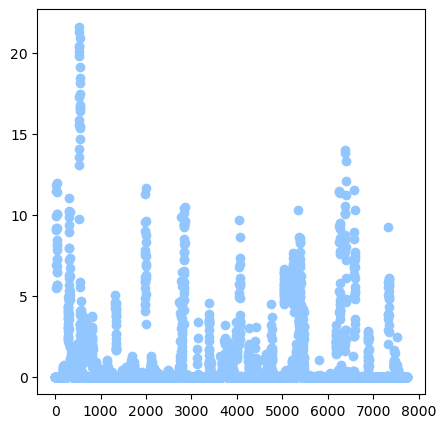

Scatter plot for LDAPS_PPT3 column with respect to the rows covered ->


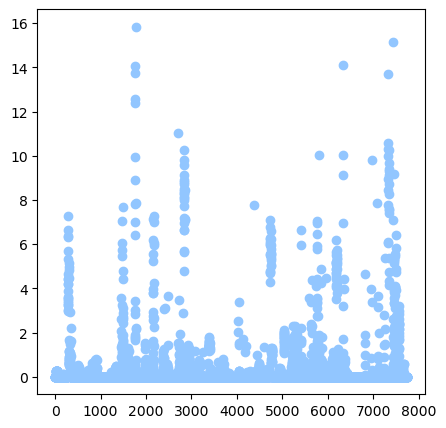

Scatter plot for LDAPS_PPT4 column with respect to the rows covered ->


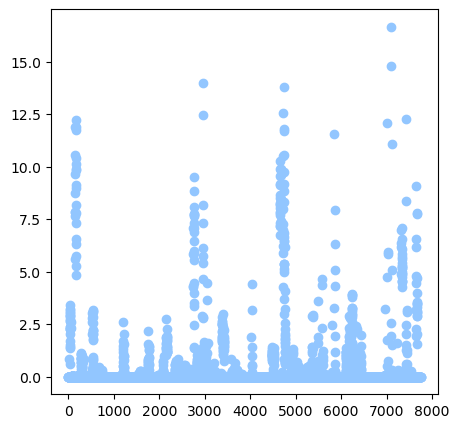

Scatter plot for Solar radiation column with respect to the rows covered ->


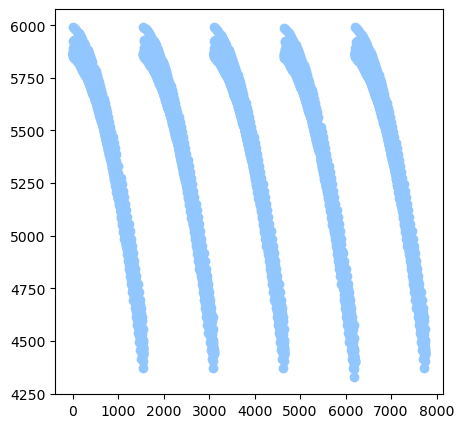

Scatter plot for Next_Tmax column with respect to the rows covered ->


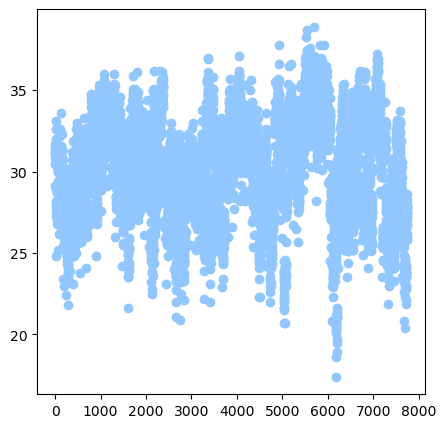

Scatter plot for Next_Tmin column with respect to the rows covered ->


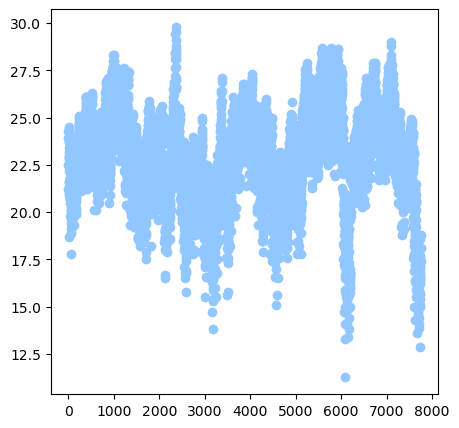

In [57]:
plt.style.use('seaborn-pastel')

for j in TMP[col2]:
    plt.figure(figsize=(5,5))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(TMP.index, TMP[j])
    plt.show()

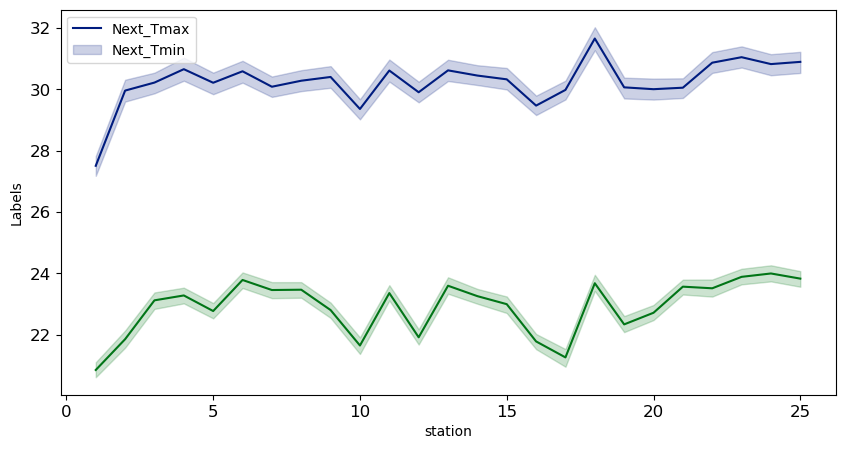

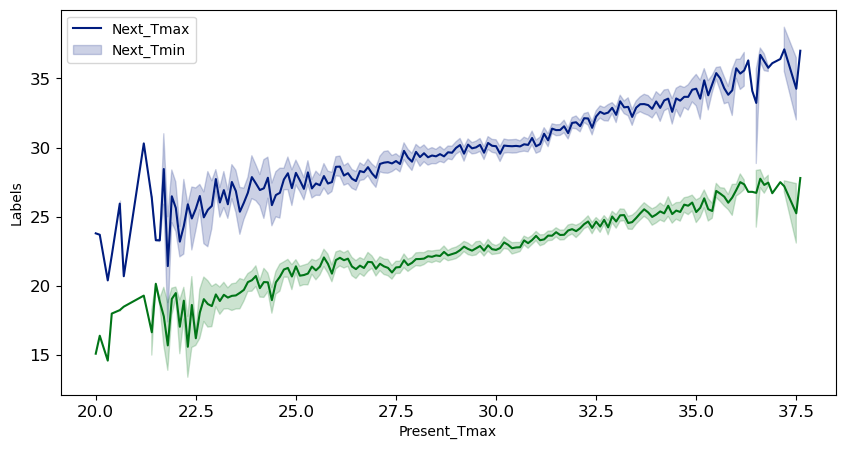

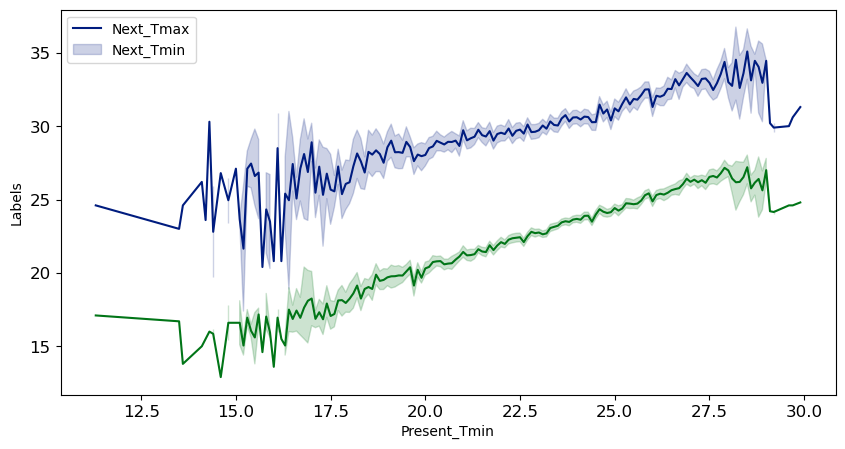

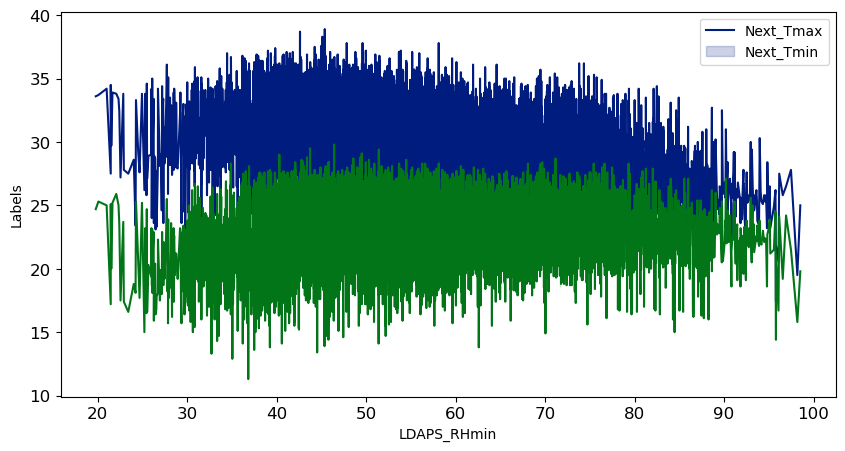

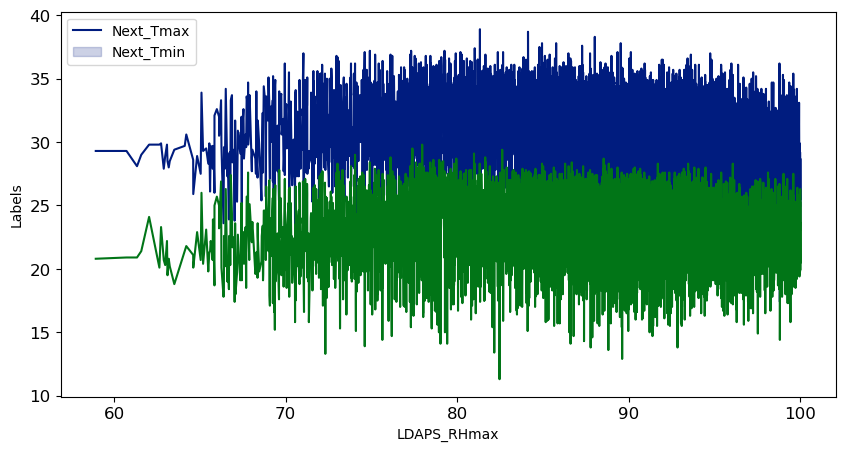

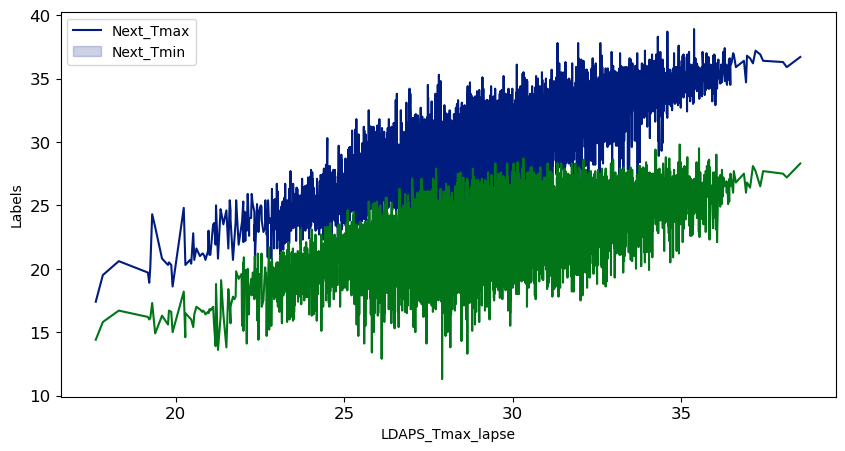

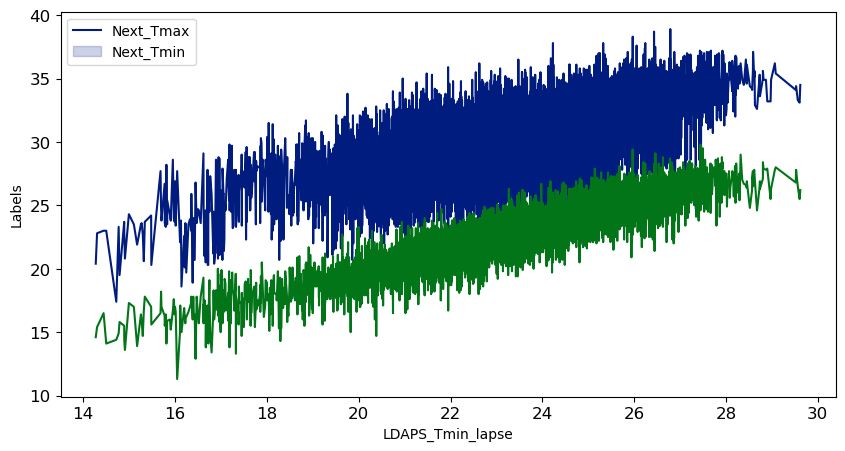

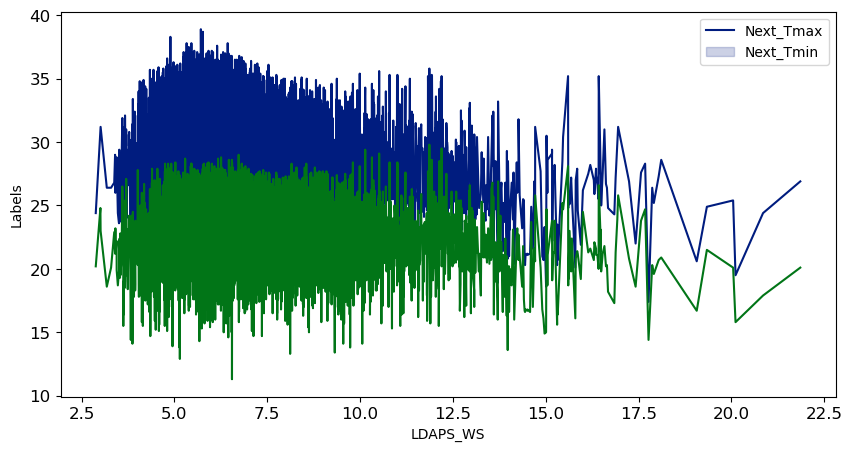

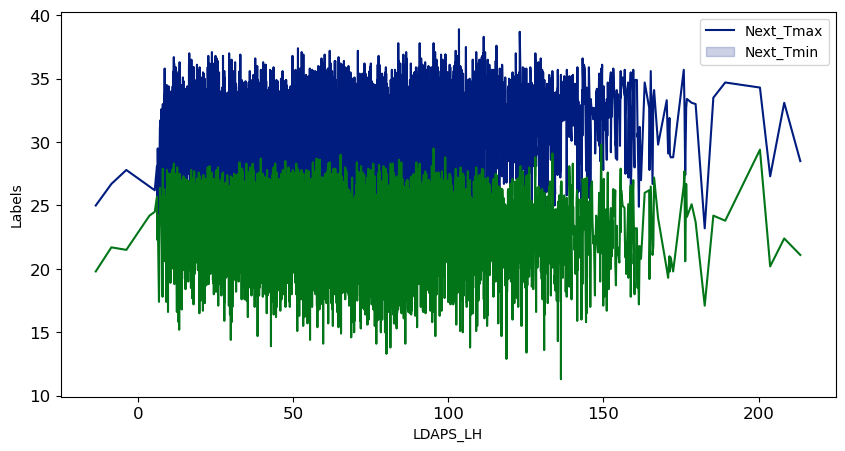

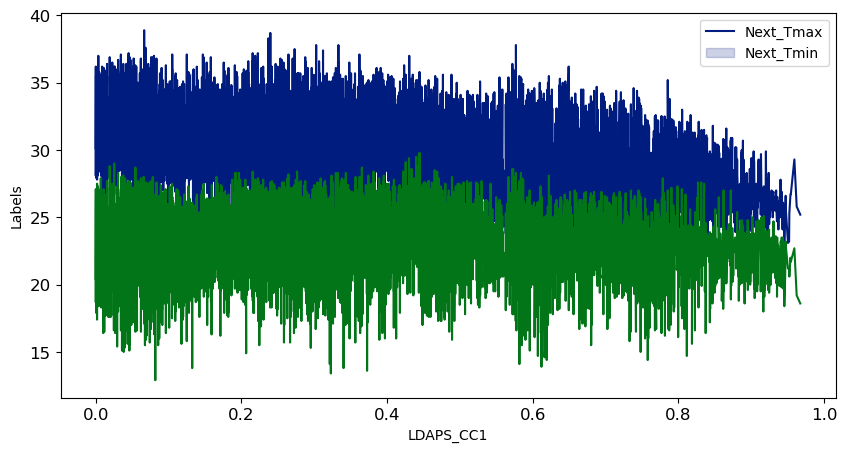

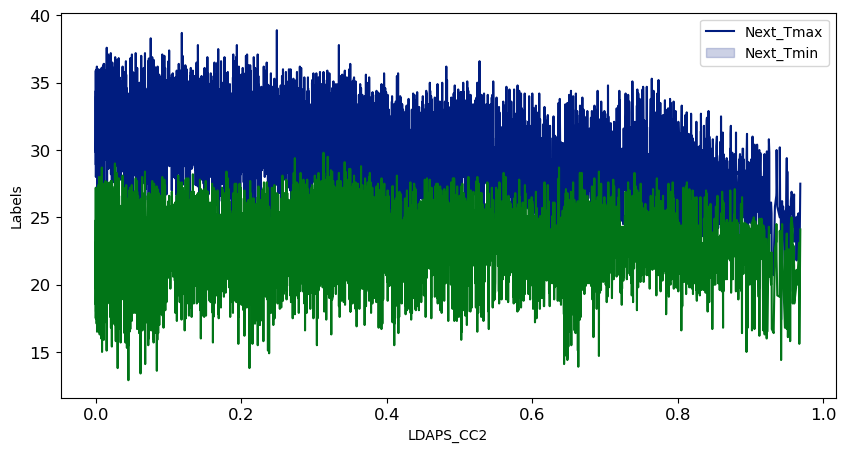

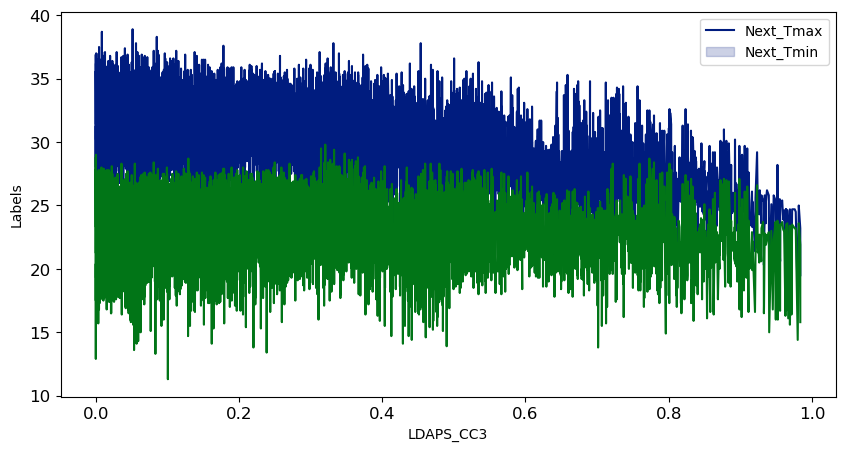

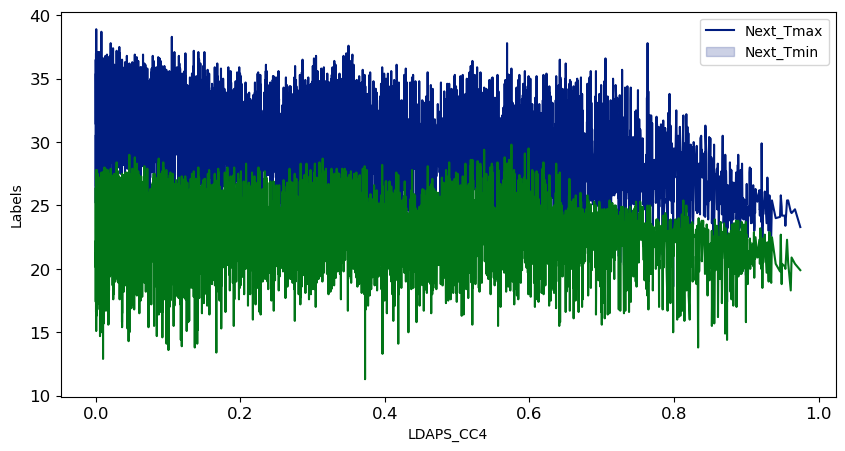

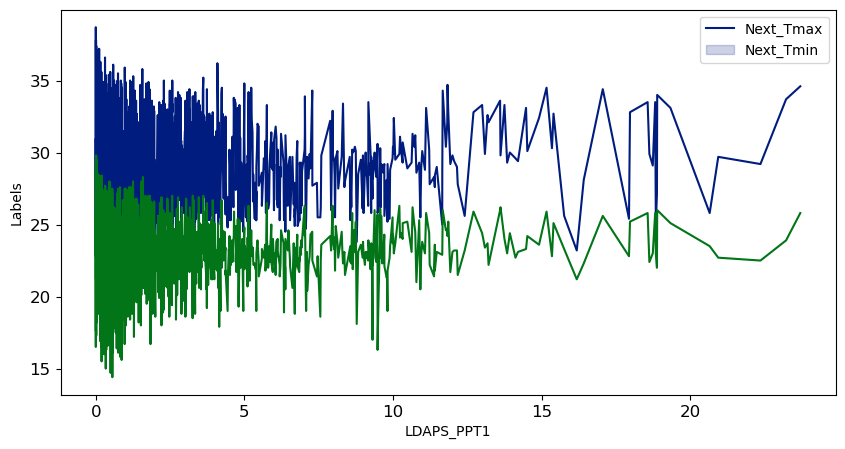

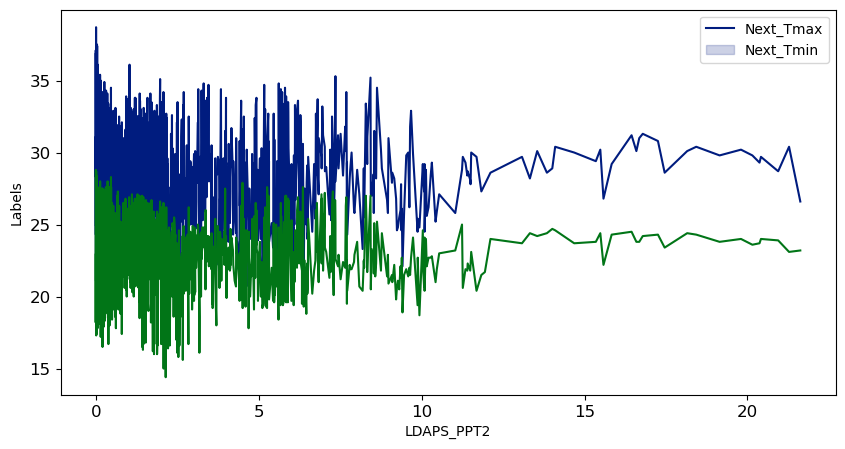

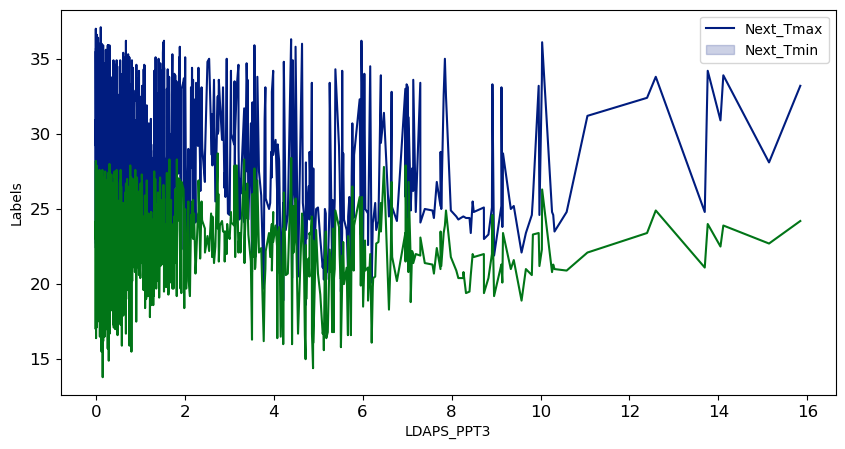

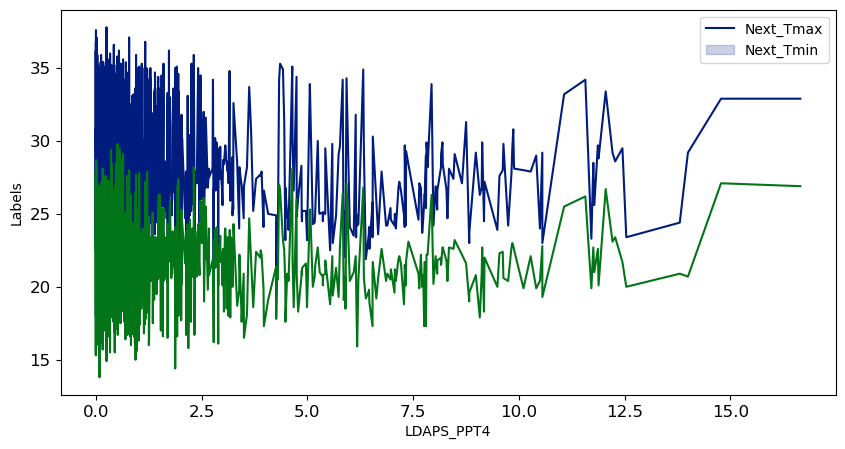

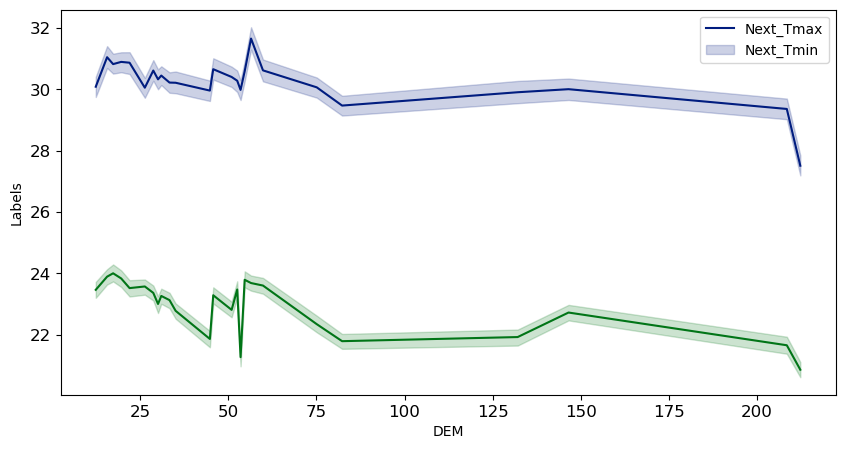

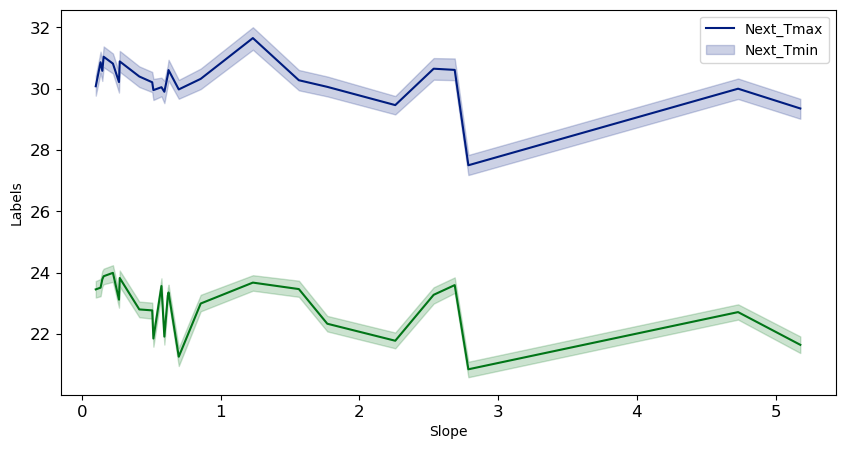

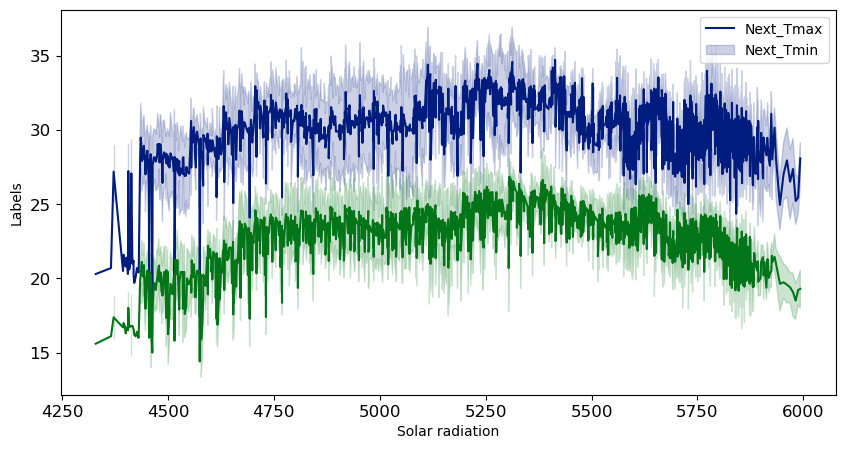

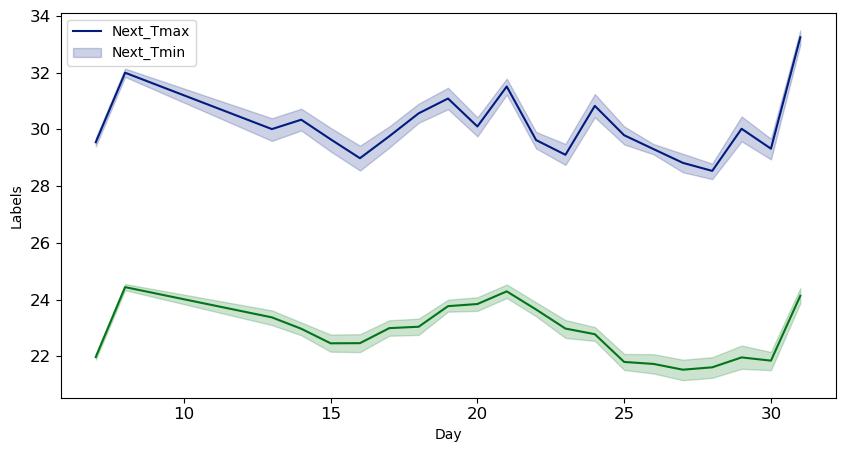

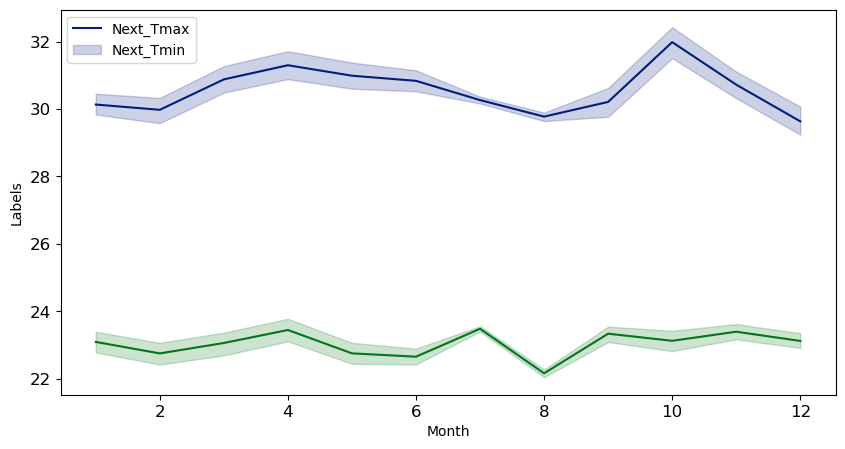

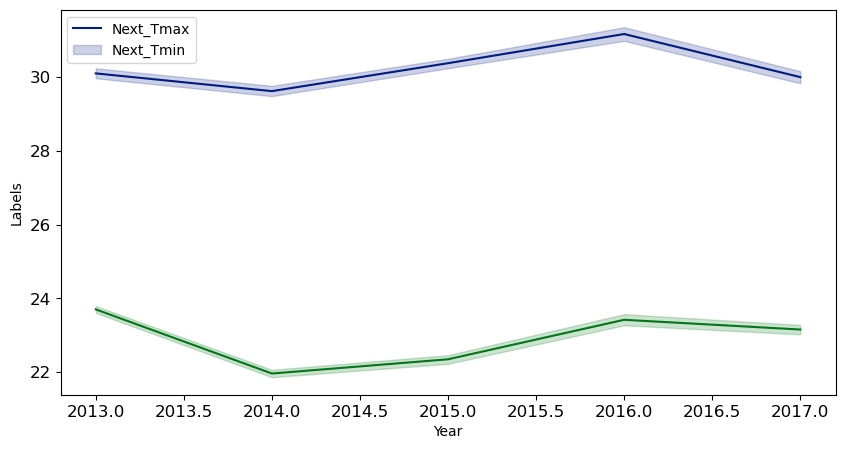

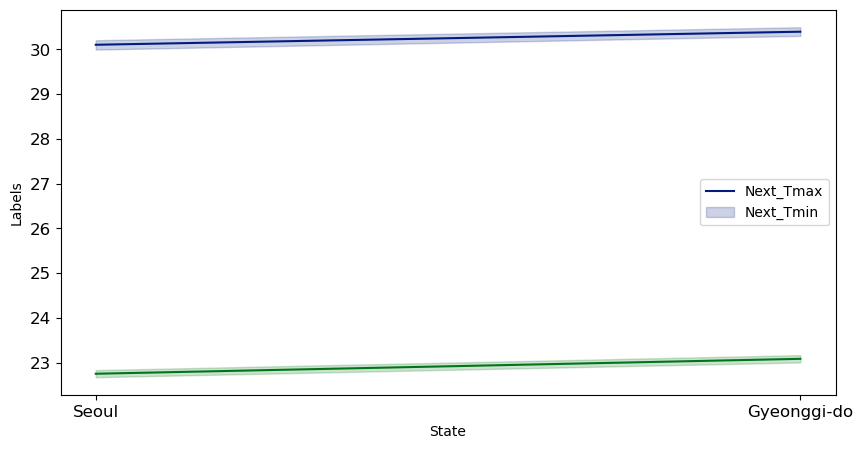

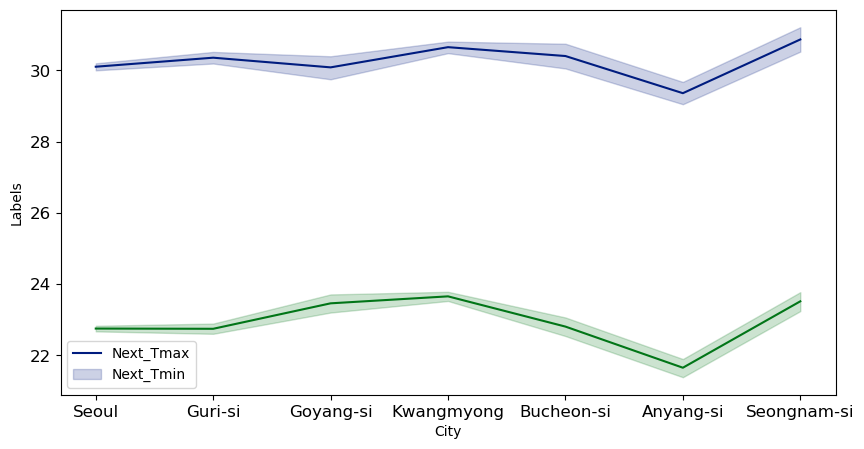

In [58]:
feature_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
            'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Day', 
                   'Month', 'Year', 'State', 'City']

label_columns = ['Next_Tmax', 'Next_Tmin']

plt.style.use('seaborn-dark-palette')

for z in TMP[feature_columns]:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=TMP[z],y=label_columns[0], data=TMP )
    sns.lineplot(x=TMP[z], y=label_columns[1], data=TMP)
    plt.ylabel('Labels')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Next_Tmax','Next_Tmin'])
    plt.show()

Encoding object datatype to numerical datatype

In [61]:
oe=OrdinalEncoder()
col=['State', 'City']
for i in col:
    TMP[i]=oe.fit_transform(TMP[i].values.reshape(-1,1))

In [66]:
TMP

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0     ...  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1     ...   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2     ...   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3     ...   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4     ...   35.0380  0.5055      5859.552246       31.2       22.5  30.0   
...   ...       ...     ...              ...        ...        ...   ...   
7745  ...   26.2980  0.5721      4456.024414       27.6       17.7  30.0   
7746  ...   21.9668  0.1332      4441.803711       28.0       17.1  30.0   
7747  ...   15.5876  0.1554      4443.313965       28.3       18.1  30.0   
7748  ...   17.2956  0.2223      4438.373535       28.6       18.8  30.0   
7749  ...   19.5844  0.2713      4451.345215       27.8       17.4  30.0   

      Month    Year  State  City  
0       6.0  2013.0    1.0   6.0  
1       6.0  2013.0    1.0   6.0  
2       6.0  2013.0    1.0   6.0  
3       6.0  2013.0    1.0   6.0  
4       6.0  2013.0    0.0   3.0  
...     ...     ...    ...   ...  
7745    8.0  2017.0    1.0   6.0  
7746    8.0  2017.0    0.0   5.0  
7747    8.0  2017.0    0.0   4.0  
7748    8.0  2017.0    0.0   4.0  
7749    8.0  2017.0    1.0   6.0  

[7588 rows x 27 columns]

In [68]:
TMP.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                 float64
Month               float64
Year                float64
State               float64
City                float64
dtype: object

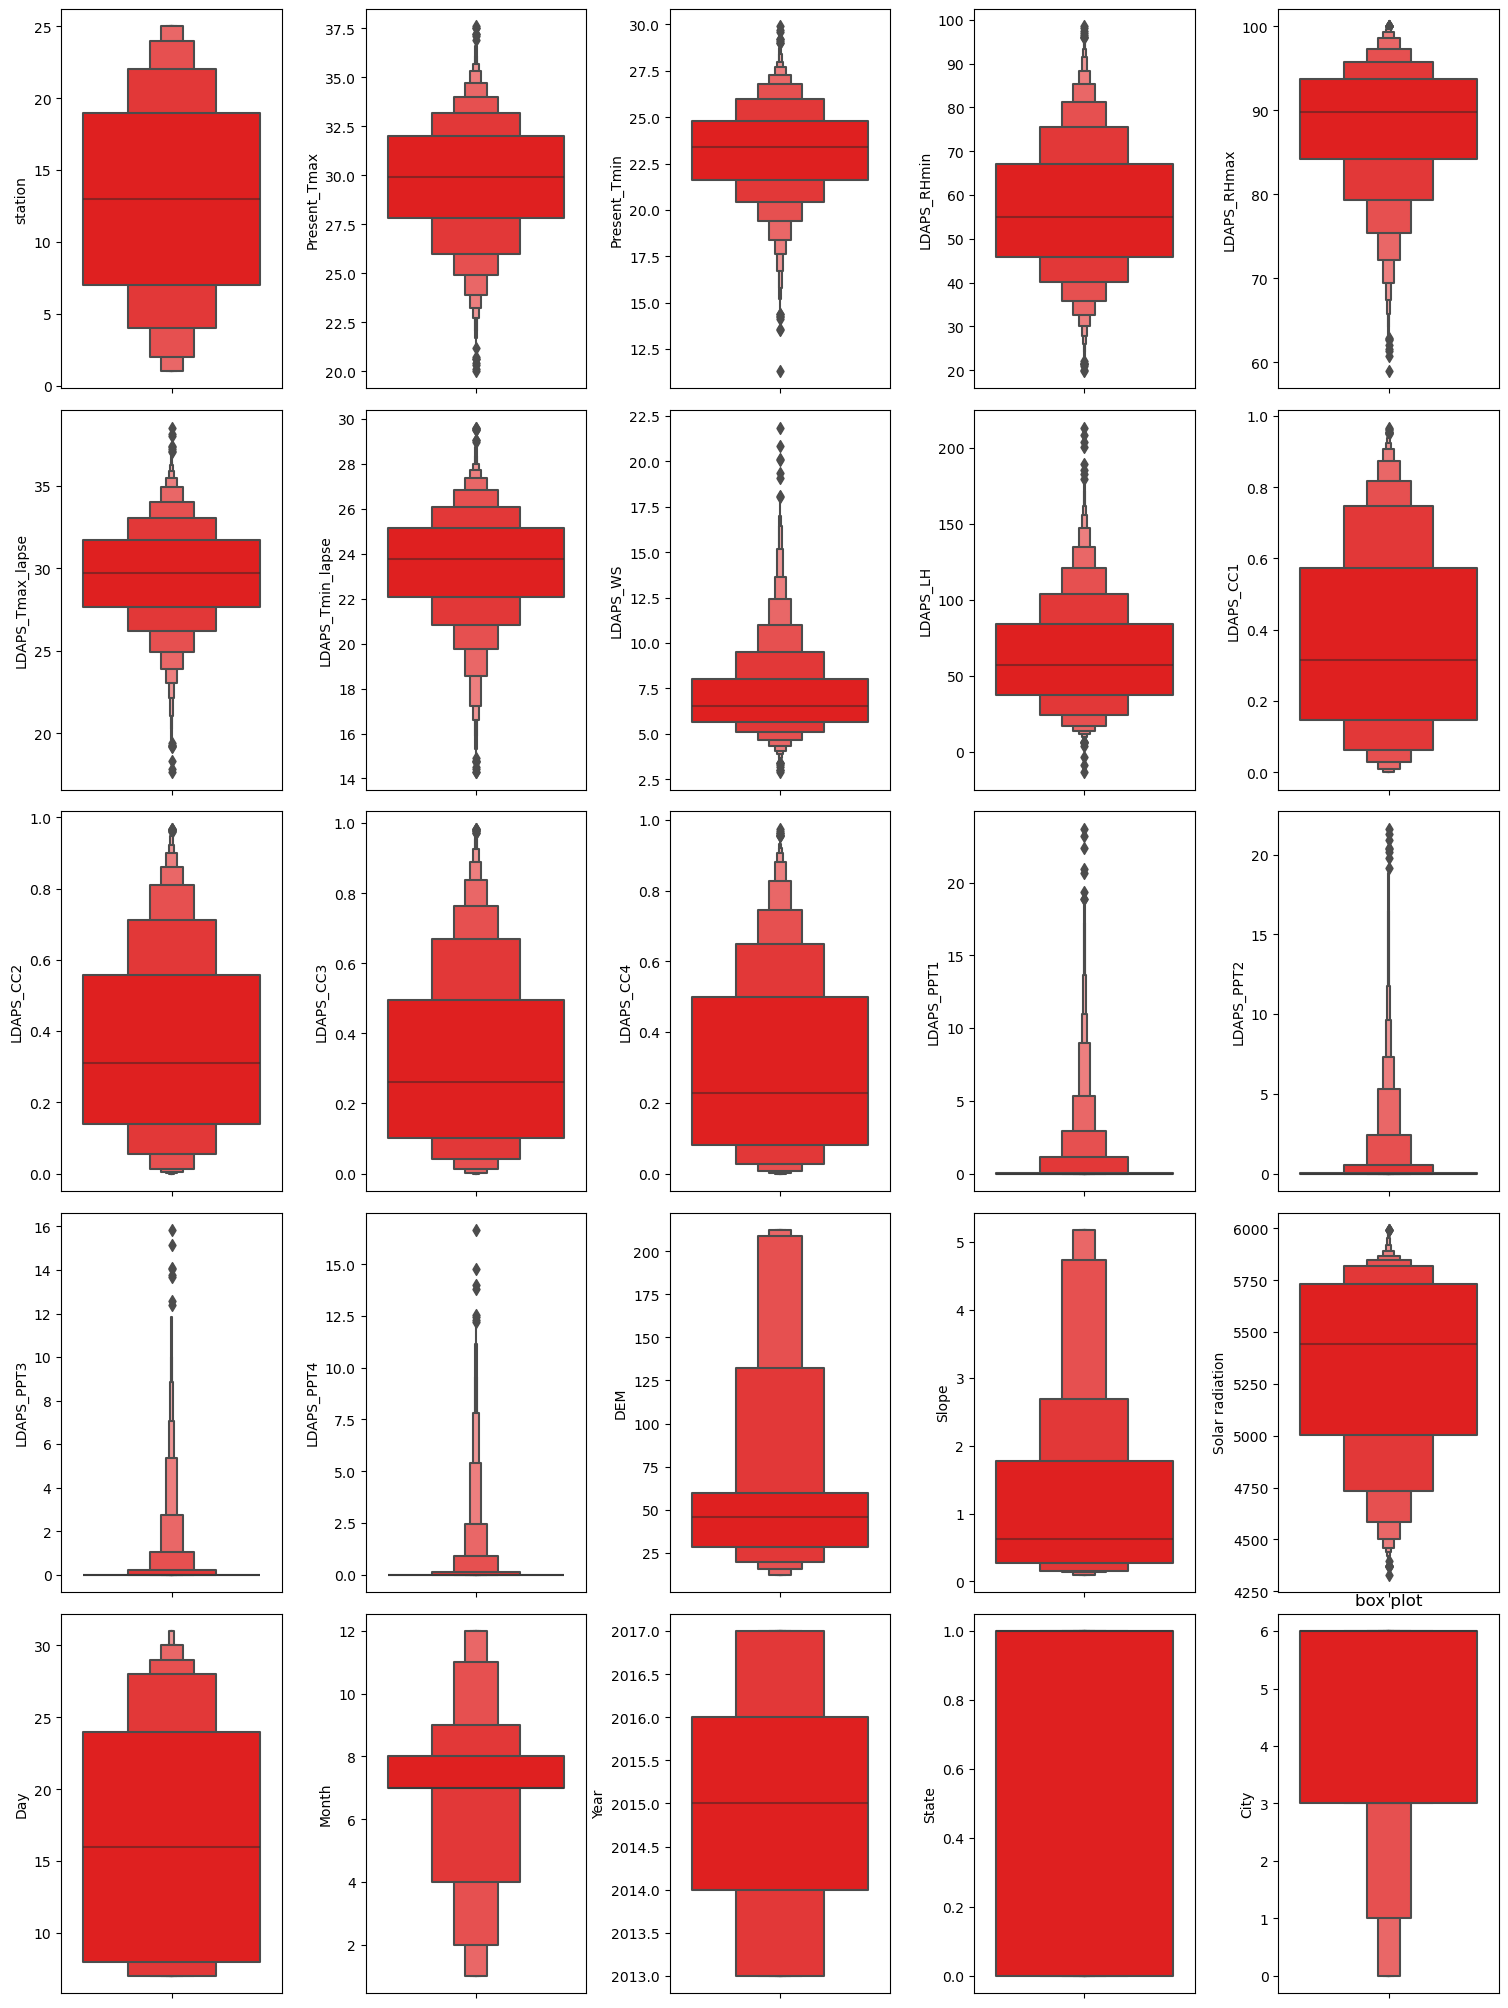

In [71]:
plt.style.use('fast')
fig, ax=plt.subplots(ncols=5, nrows=5,figsize=(15,20))
index=0
ax=ax.flatten()
for col, value in TMP[feature_columns].items():
    sns.boxenplot(y=col, data=TMP, ax=ax[index], color='Red')
    index += 1
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.title('box plot')
plt.show()

In [72]:
TMP.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
State              -0.084964
City               -0.973089
dtype: float64

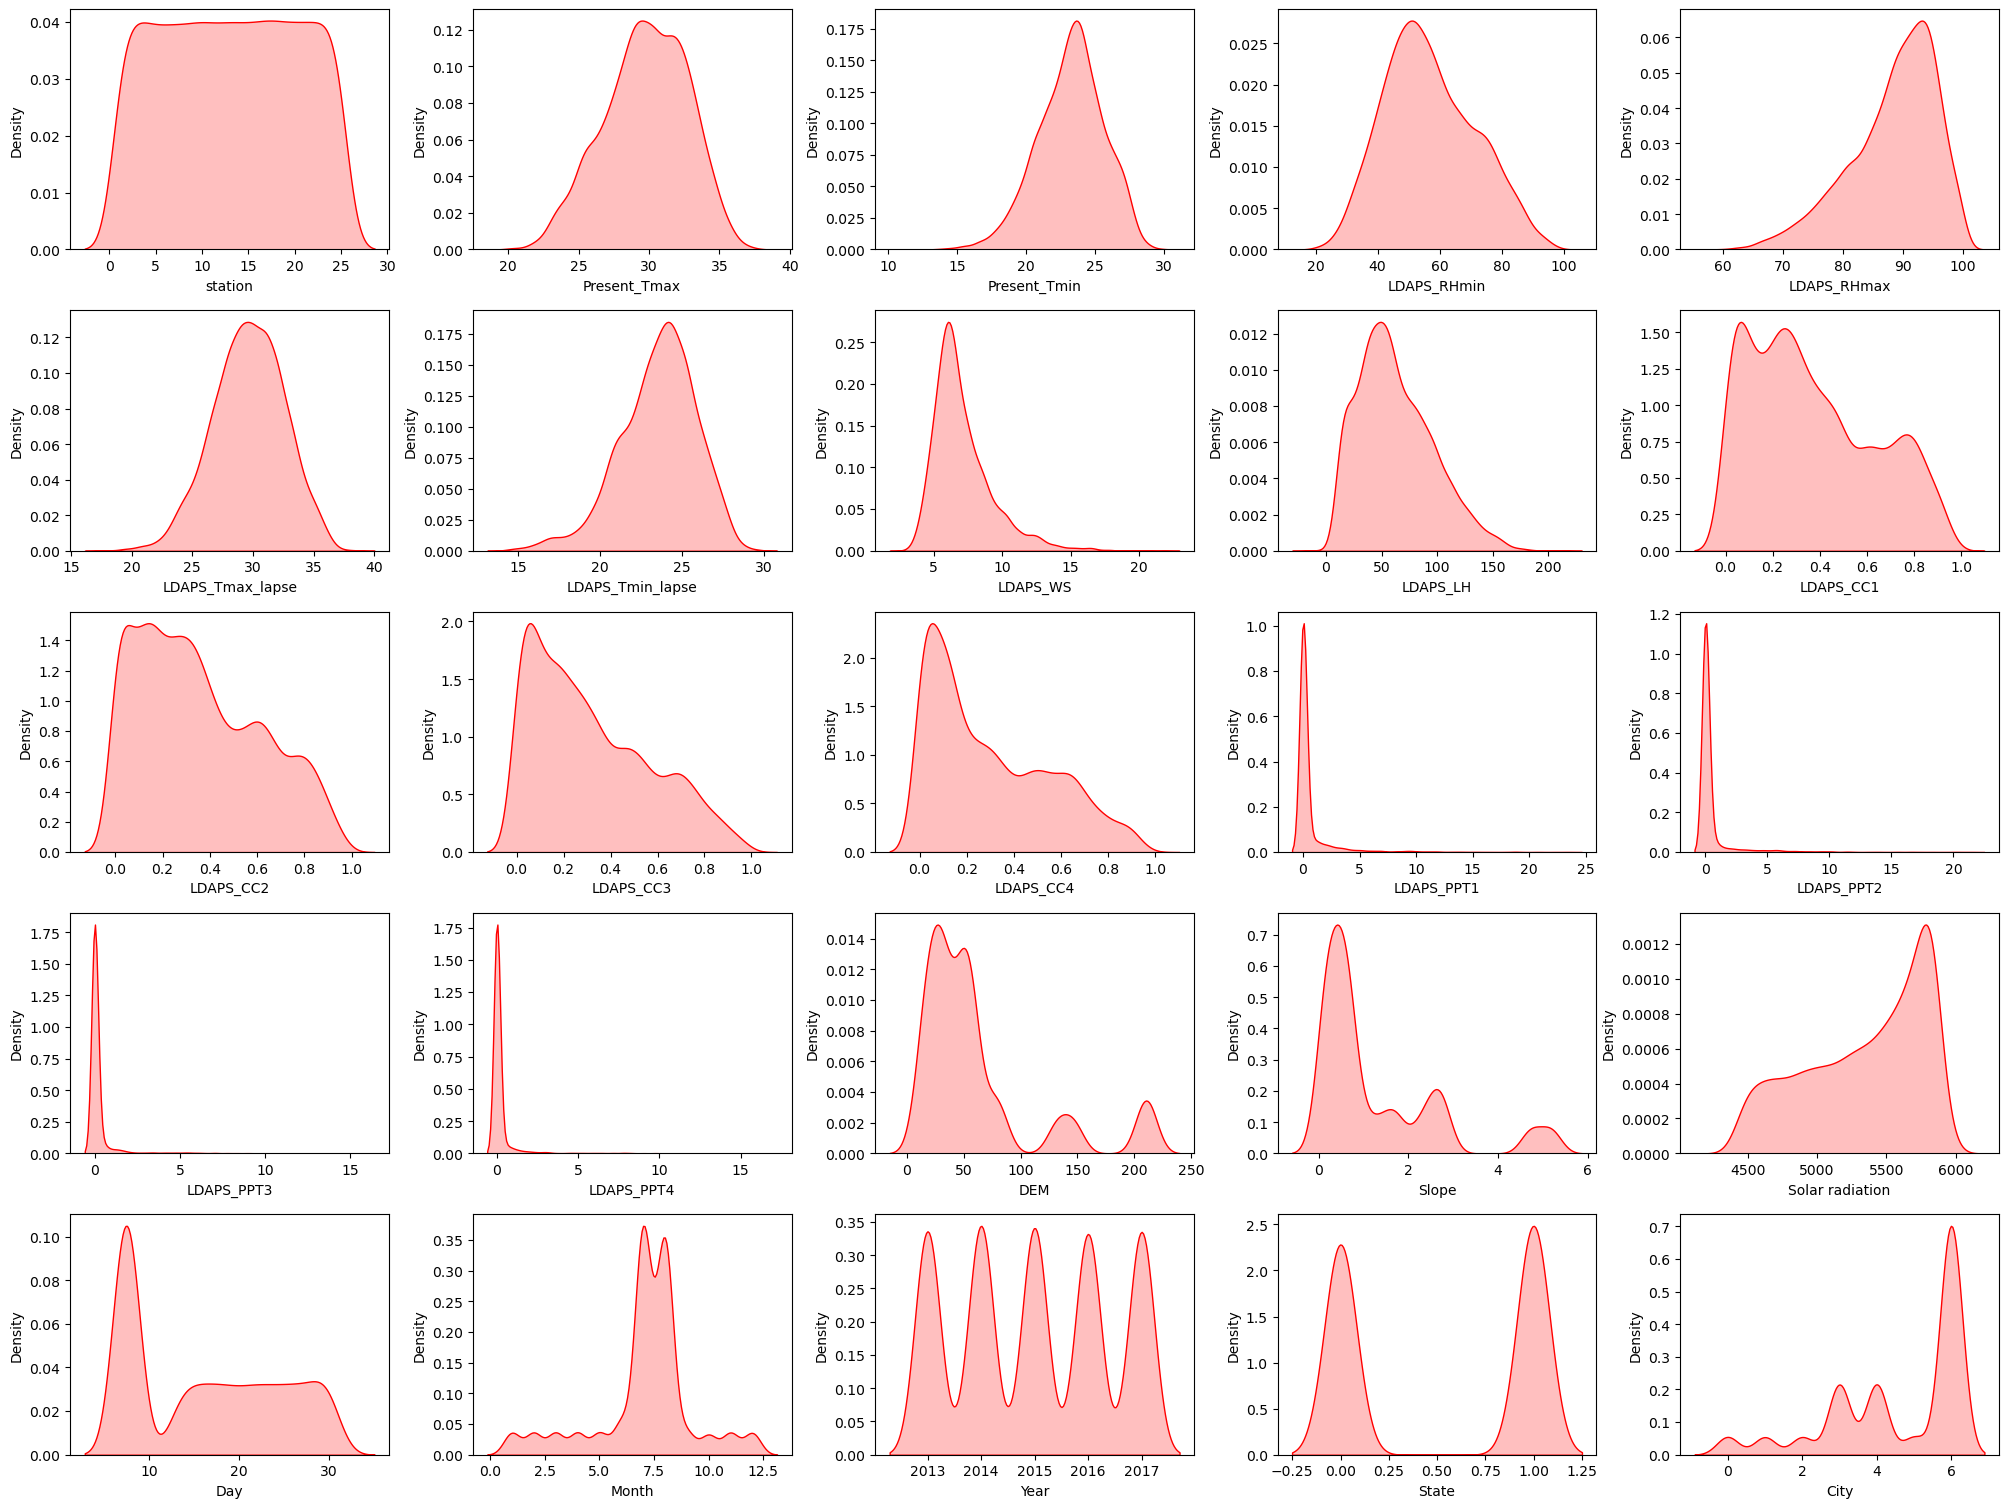

In [73]:
fig, ax=plt.subplots(ncols=5,nrows=5, figsize=(20,15))
index=0
ax=ax.flatten()
for col, values in TMP[feature_columns].items():
    sns.distplot(values, ax=ax[index], hist=False, color='r', kde_kws={'shade':True})
    index += 1
    
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.show()

# Using Zscore to ramove the outliers

In [78]:
z = np.abs(zscore(TMP))
threshold = 3
TMP1 = TMP[(z<3).all(axis = 1)]
loss=(TMP.shape[0]- TMP1.shape[0])/TMP.shape[0]*100
loss

11.188719030047443

In [79]:
TMP=TMP1.copy()

# Using Log Transform to fix skewness

In [80]:
for col in feature_columns:
    if TMP.skew().loc[col]>.55:
        TMP[col]=np.log1p(TMP[col])

In [81]:
TMP.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.616039
LDAPS_CC1           0.329077
LDAPS_CC2           0.505774
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State              -0.073965
City               -0.968512
dtype: float64

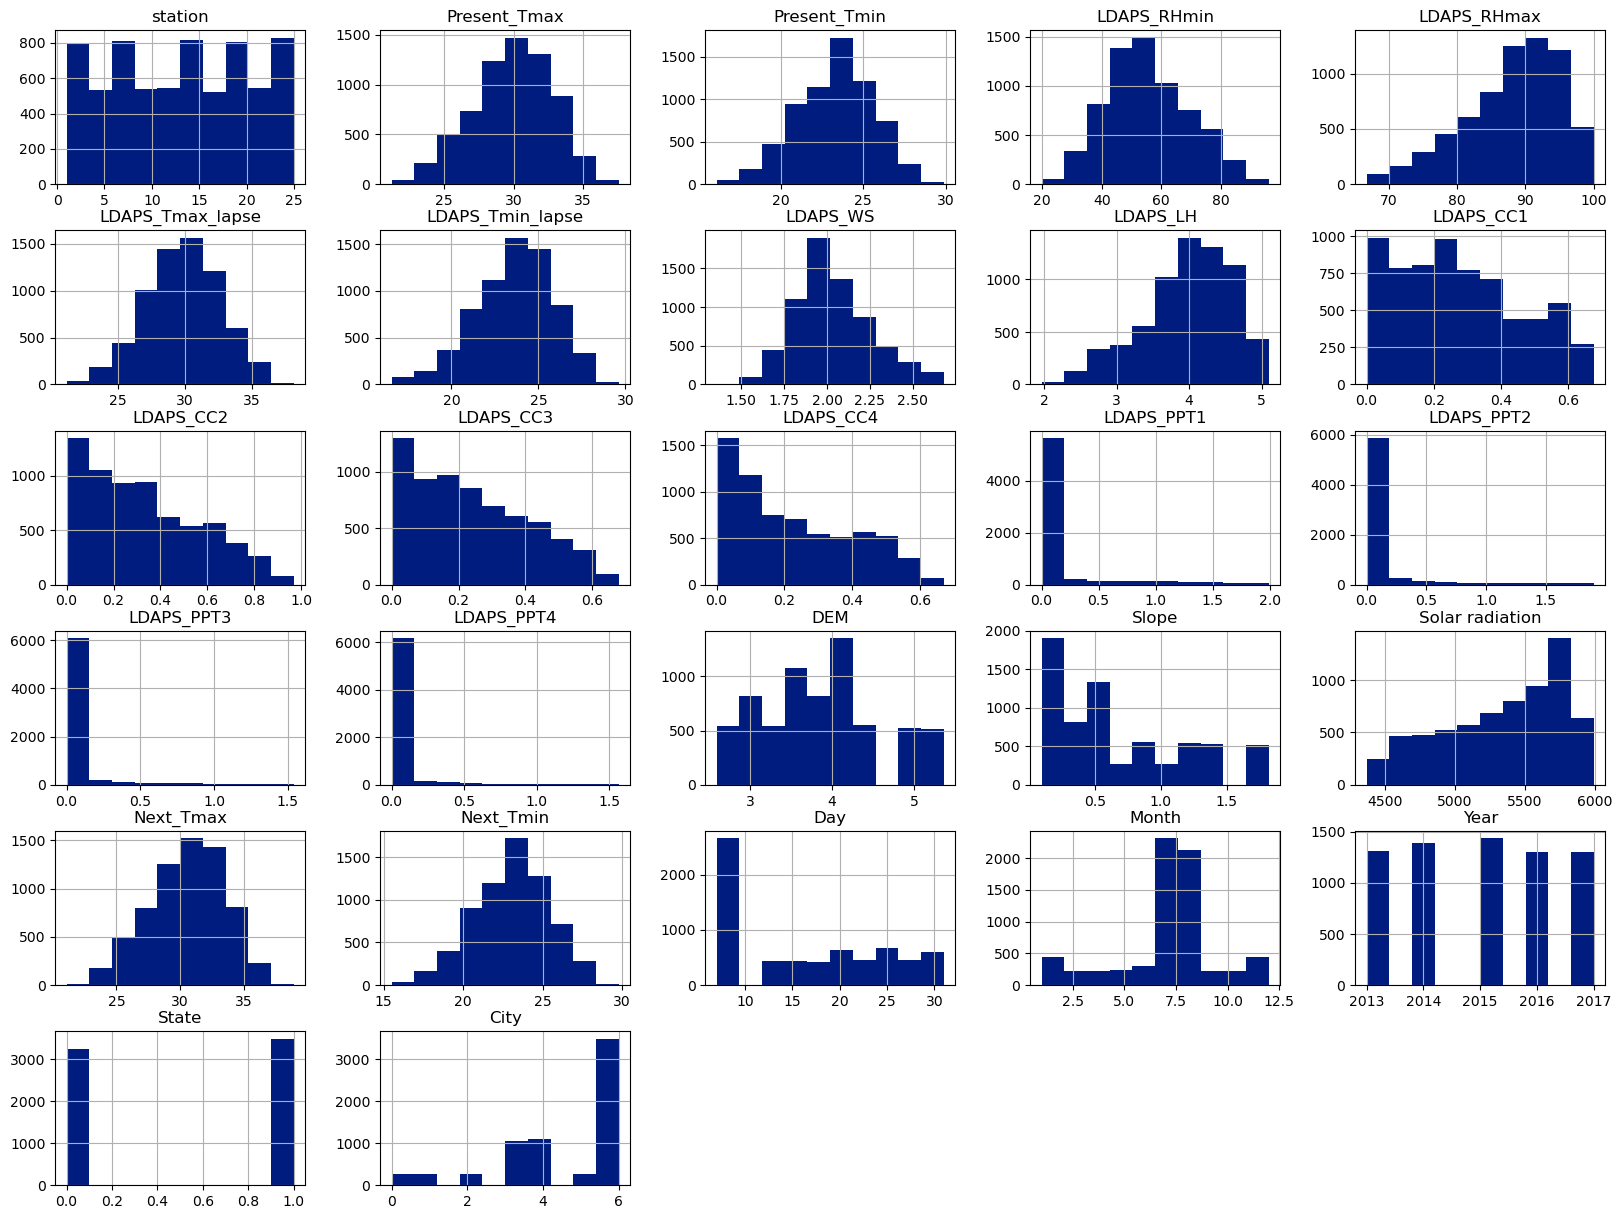

In [82]:
TMP.hist(figsize=(20,15))
plt.show()

# Correlation using a Heatmap

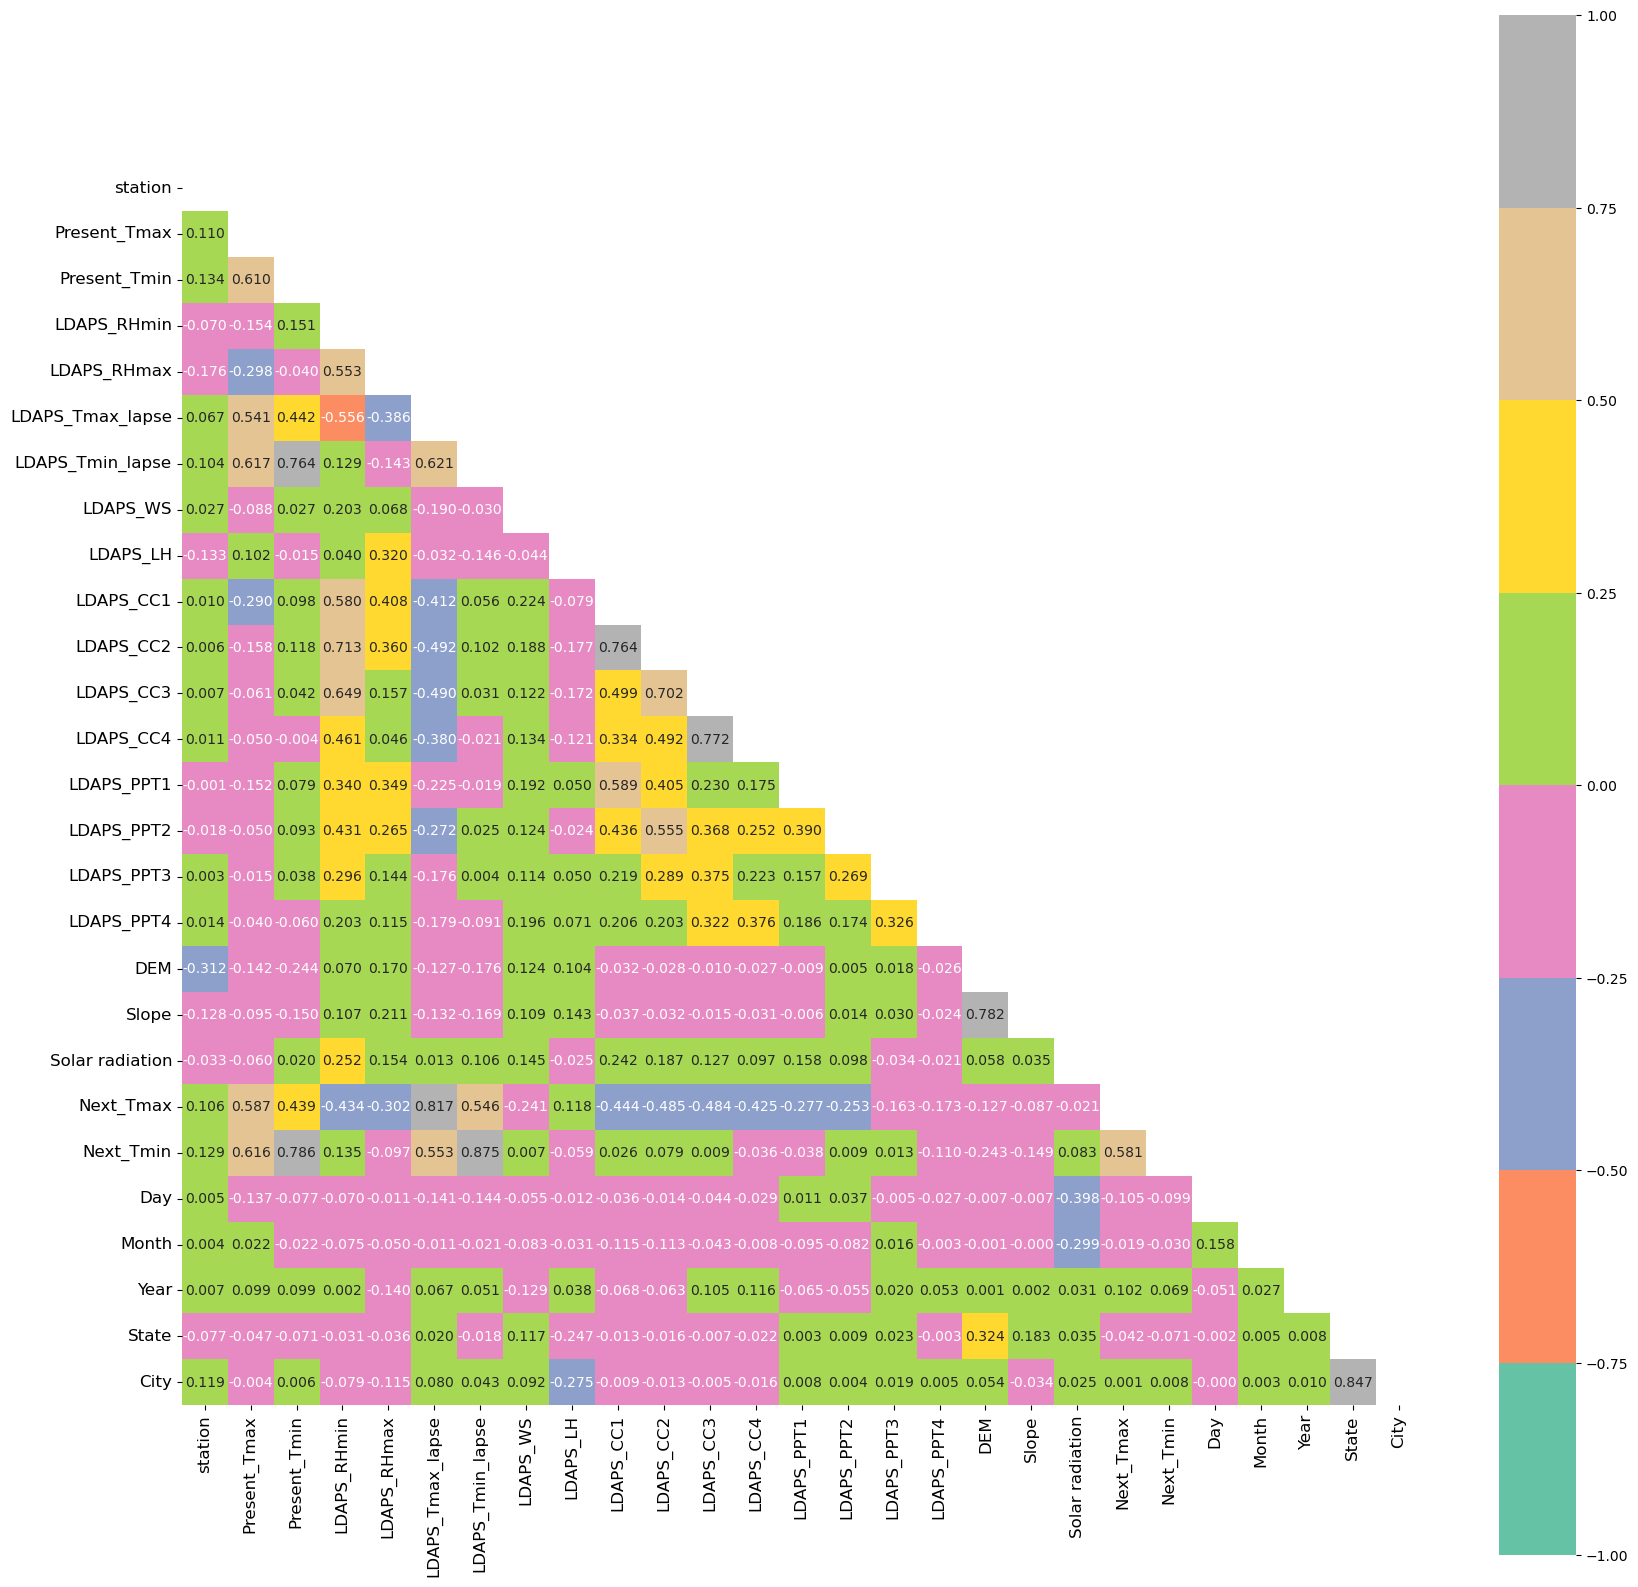

In [84]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(TMP.corr())
figure=plt.figure(figsize=(20,20))
sns.heatmap(TMP.corr(),vmin=-1,vmax=1, annot=True, square=True, fmt='.3f',annot_kws={'size':10},cmap='Set2',mask=upper_triangle)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

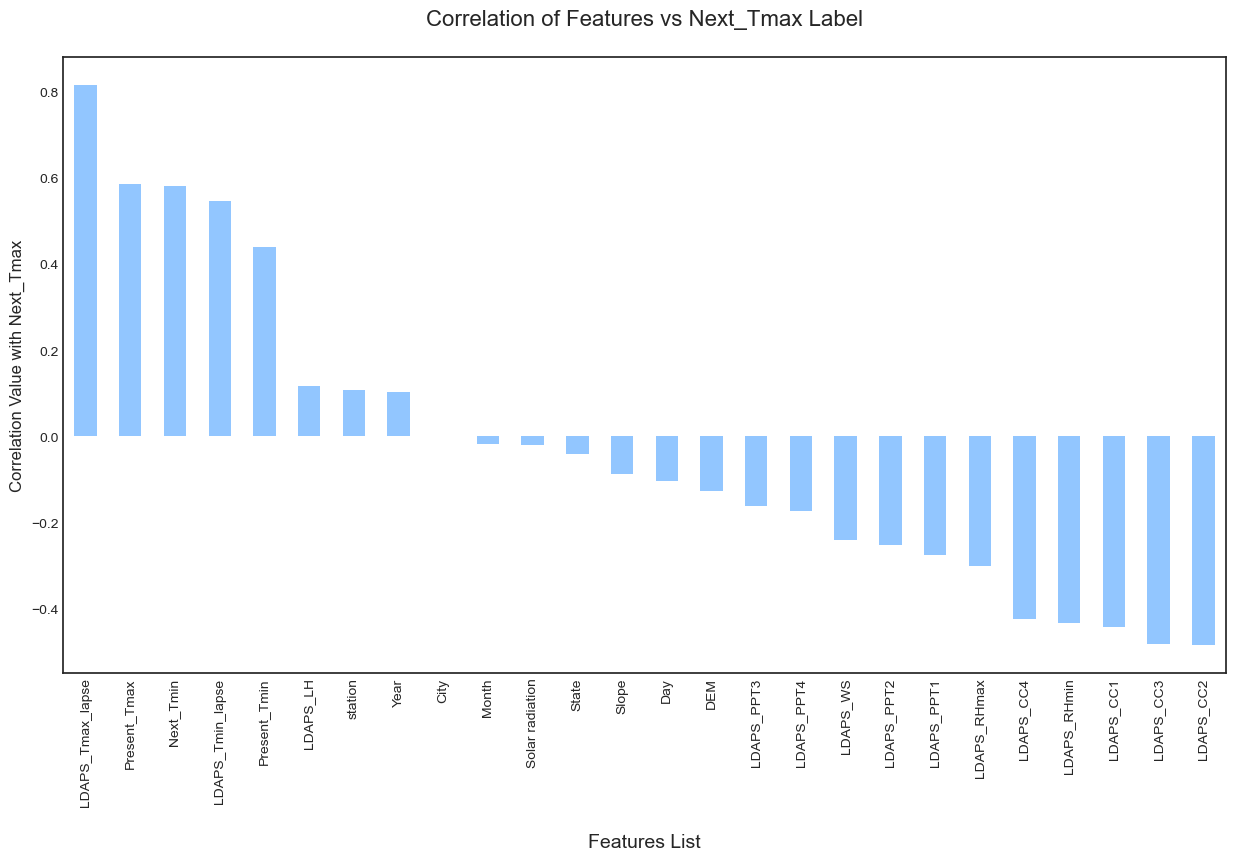

In [85]:
plt.style.use('seaborn-white')

TMP_corr = TMP.corr()
plt.figure(figsize=(15,8))
TMP_corr[label_columns[0]].sort_values(ascending=False).drop(label_columns[0]).plot.bar()
plt.title("Correlation of Features vs Next_Tmax Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value with Next_Tmax", fontsize=12)
plt.show()

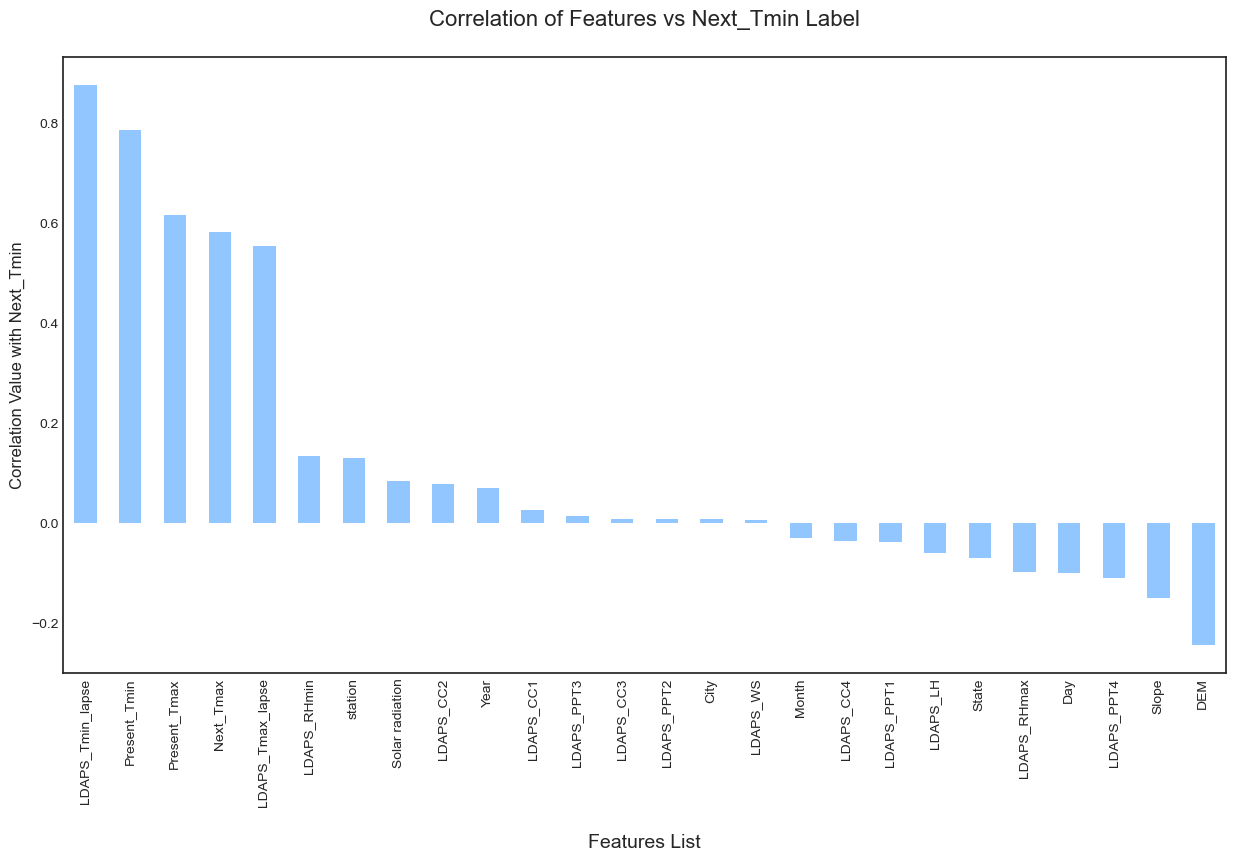

In [88]:
plt.style.use('seaborn-white')

TMP_corr = TMP.corr()
plt.figure(figsize=(15,8))
TMP_corr[label_columns[1]].sort_values(ascending=False).drop(label_columns[1]).plot.bar()
plt.title("Correlation of Features vs Next_Tmin Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value with Next_Tmin", fontsize=12)
plt.show()

# Splitting whole the dataset into two parts namely X, Y

In [89]:
X=TMP.drop('Next_Tmax', axis=1)
Y=TMP['Next_Tmax']
Y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [90]:
X.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmin           0
Day                 0
Month               0
Year                0
State               0
City                0
dtype: int64

# Feature Scaling

In [91]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.437537   
1    -1.533959      0.690215     -0.727785    -0.236604     0.364239   
2    -1.395198      0.585598      0.008945    -0.494494    -0.585732   
3    -1.256438      0.725088      0.052282     0.194767     1.206456   
4    -1.117678      0.515853     -0.597774     0.045667     0.299831   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.404059   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.626356   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.316889   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.542506   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.549845   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.662498         -0.289928  0.092116  0.452470  -0.379923  ...   
1            -0.016693          0.171379 -0.612887 -0.012952  -0.417662  ...   
2             0.070769          0.409475 -0.320426 -1.474701  -0.490678  ...   
3            -0.069787         -0.146681 -0.641296  0.364021  -0.458811  ...   
4            -0.284509         -0.074752 -0.583798  1.162615  -0.760645  ...   
...                ...               ...       ...       ...        ...  ...   
6734         -0.757521         -2.400625 -0.034556 -2.629659  -1.252451  ...   
6735         -1.160213         -2.620034 -0.561605  0.722258  -1.182088  ...   
6736         -1.288468         -2.188536 -0.313645  0.511627  -1.373202  ...   
6737         -1.049238         -2.207453 -0.070703 -0.164217  -1.342114  ...   
6738         -0.711421         -2.301931  0.356727 -2.712108  -1.273113  ...   

      LDAPS_PPT4       DEM     Slope  Solar radiation  Next_Tmin       Day  \
0       -0.27701  2.091329  1.330799         1.543068  -0.790587  1.674045   
1       -0.27701 -0.026415 -0.502169         1.249502  -0.239151  1.674045   
2       -0.27701 -0.422779 -0.860029         1.235827   0.354704  1.674045   
3       -0.27701  0.001957  1.193982         1.220170   0.524376  1.674045   
4       -0.27701 -0.355053 -0.513564         1.226317  -0.239151  1.674045   
...          ...       ...       ...              ...        ...       ...   
6734    -0.27701 -0.737167 -0.426965        -2.107693  -2.275223  1.674045   
6735    -0.27701 -0.974837 -1.081884        -2.141474  -2.529732  1.674045   
6736    -0.27701 -1.422480 -1.043071        -2.137886  -2.105550  1.674045   
6737    -0.27701 -1.287655 -0.930463        -2.149622  -1.808623  1.674045   
6738    -0.27701 -1.125498 -0.851830        -2.118808  -2.402477  1.674045   

         Month      Year     State      City  
0    -0.479519 -1.421473  0.963709  0.815820  
1    -0.479519 -1.421473  0.963709  0.815820  
2    -0.479519 -1.421473  0.963709  0.815820  
3    -0.479519 -1.421473  0.963709  0.815820  
4    -0.479519 -1.421473 -1.037658 -0.886113  
...        ...       ...       ...       ...  
6734  0.410206  1.442938  0.963709  0.815820  
6735  0.410206  1.442938 -1.037658  0.248509  
6736  0.410206  1.442938 -1.037658 -0.318802  
6737  0.410206  1.442938 -1.037658 -0.318802  
6738  0.410206  1.442938  0.963709  0.815820  

[6739 rows x 26 columns]

In [95]:
# Replace NaN values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Finding Best Random State for building best Regression ML model

In [96]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)*100
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 80.96870588382326 on Random State 470


# Feature Importance

In [97]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                    
LDAPS_Tmax_lapse       0.647
Present_Tmax           0.059
Next_Tmin              0.037
LDAPS_CC1              0.033
LDAPS_CC4              0.029
LDAPS_CC3              0.027
LDAPS_WS               0.021
LDAPS_LH               0.015
LDAPS_CC2              0.015
Solar radiation        0.014
Day                    0.012
LDAPS_RHmin            0.010
Present_Tmin           0.010
LDAPS_RHmax            0.009
LDAPS_Tmin_lapse       0.009
Year                   0.008
Month                  0.008
LDAPS_PPT1             0.007
station                0.006
DEM                    0.006
LDAPS_PPT2             0.006
LDAPS_PPT3             0.004
Slope                  0.003
LDAPS_PPT4             0.003
City                   0.001
State                  0.000

In [102]:
def reg(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=.25, random_state=815)
    
    #model Training
    model.fit(X_train,Y_train)
    
    #predicting Y_test
    pred=model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #cross val score
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cross val score =', cv_score)
    
    #Result
    result=r2-cv_score
    print('r2_score - cv_score =', result)

In [103]:
#LinearRegression
model=LinearRegression()
reg(model,X,Y)

RMSE Score is: 1.2985717103252628
R2 Score is: 80.93530116257509
cross val score = 69.52285631294711
r2_score - cv_score = 11.412444849627974


In [104]:
#Ridge
model=Ridge()
reg(model,X,Y)

RMSE Score is: 1.2985945770148182
R2 Score is: 80.93462973198002
cross val score = 69.52775486537028
r2_score - cv_score = 11.40687486660974


In [105]:
# Lasso
model=Lasso()
reg(model,X,Y)

RMSE Score is: 1.9994556602807663
R2 Score is: 54.801748988108216
cross val score = 49.66272403537687
r2_score - cv_score = 5.139024952731347


In [106]:
#DecisionTree Regressor
model=DecisionTreeRegressor()
reg(model,X,Y)

RMSE Score is: 1.2936663790547915
R2 Score is: 81.07906223497956
cross val score = 40.00492874321324
r2_score - cv_score = 41.07413349176632


In [107]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.9030762950738254
R2 Score is: 59.05409507897432
cross val score = 50.24417429436359
r2_score - cv_score = 8.809920784610732


In [108]:
# KNeighbors Regressor

model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.1018119686422558
R2 Score is: 86.27497811454118
cross val score = 44.28763100366617
r2_score - cv_score = 41.987347110875014


In [109]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.7874168031979366
R2 Score is: 92.99017088690626
cross val score = 67.47383301419558
r2_score - cv_score = 25.51633787271068


# Hyper parameter tuning upon our best Regression Ml model

In [115]:
params = {'alpha': [1, 2, 3, 4, 5],
          'fit_intercept': [True, False],
          'solver': ['auto', 'svd', 'saga', 'sparse_cg']}

In [116]:
GSCV=GridSearchCV(Ridge(),params, cv=5)

In [117]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'saga', 'sparse_cg']})

In [118]:
GSCV.best_score_

0.7809565344765053

In [119]:
GSCV.best_params_

{'alpha': 5, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [121]:
Final_Model=Ridge(alpha=3, fit_intercept=True, solver='saga')
Final_Model.fit(X_train,Y_train)
pred=Final_Model.predict(X_test)
r2_score=r2_score(pred,Y_test)*100
print('r2 score is ',r2_score)

r2 score is  72.1272691936913


# Save the model

In [122]:
Filename='final_model_TMP'
joblib.dump(Final_Model,Filename)

['final_model_TMP']